In [1]:
import re
import time
import os
import math

import requests

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report



In [2]:
def inverse_lookup(d, x):
    for k,v in d.items():
        if x == v:
            return k

In [3]:
# 当月YYYYMM
this_month = '202012'
# 前月以前YYYYMM
last_months = ['202011', '202010', '202009', '202008', '202007', '202006', '202005', '202004', '202003', '202002', '202001', '201912', '201911']


#### データ取得関数

In [4]:

def select_db(sql, cash=True):
    if os.path.isfile(sql + '.csv') & cash:
        return '', True
    
    
    url = 'https://brdbc.team-nave.com/system/db'
    tncid = 'poppopoh777@yahoo.co.jp'
    tncpw = 'nissy315'
    print(sql)
    response = requests.post(url, data={'prccd':'select', 'tncid':tncid, 'tncpw':tncpw, 'cmd1':sql})

    qid = re.findall('[0-9]{10}', response.text)[0]
    
    print(response.status_code)    # HTTPのステータスコード取得
    print(qid)
    
    return str(qid), False

def get_db(qid, sql='', cash=True):
    if os.path.isfile(sql + '.csv') & cash:
        df = pd.read_csv(sql + '.csv')
        return df, True
    
    print(qid)
    url = 'https://brdbc.team-nave.com/system/db'
    tncid = 'poppopoh777@yahoo.co.jp'
    tncpw = 'nissy315'
    response = requests.post(url, data={'prccd':'getcsv', 'tncid':tncid, 'tncpw':tncpw, 'qid':qid})
    response.encoding = 'shift-jis'

    print(response.status_code)
    
    text = response.text.split('\r\n')
    def split(txt):
        txt = txt.replace('\"', '')
        return txt.split(',')
    array = list(map(split, text))
    array.pop(-1)
    df = pd.DataFrame(array[1:], columns=array[0])
    
    df.to_csv(sql + '.csv', index=False)
    
    return df, False


In [5]:
#### 直近のレース情報をgetする


#### 当日情報を更新する場合
#### 当日情報を更新する場合
#### 当日情報を更新する場合


# ### 開催概要（OPMST）
# sql = 'SELECT * FROM OPMST WHERE SOPDT LIKE \'{0}%\';'.format(this_month)
# qid, r = select_db(sql, False)
# time.sleep(10)
# opmst_mst, r = get_db(qid, sql, False)
# display(opmst_mst)

# ### レース概要（RACEMST）
# sql = 'SELECT * FROM RACEMST WHERE SOPDT LIKE \'{0}%\';'.format(this_month)
# qid, r = select_db(sql, False)
# time.sleep(20)
# racemst_mst, r = get_db(qid, sql, False)
# display(racemst_mst)

# ### レース詳細（RACEDTL）
# sql = 'SELECT * FROM RACEDTL WHERE SOPDT LIKE \'{0}%\';'.format(this_month)
# qid, r = select_db(sql, False)
# time.sleep(30)
# racedtl_mst, r = get_db(qid, sql, False)
# display(racedtl_mst)


In [6]:
#### 直近のレース情報をgetする

### 開催概要（OPMST）
sql = 'SELECT * FROM OPMST WHERE SOPDT LIKE \'{0}%\';'.format(this_month)
qid, r = select_db(sql, True)
if r is False:
    time.sleep(10)
opmst_mst, r = get_db(qid, sql, True)
display(opmst_mst)

### レース概要（RACEMST）
sql = 'SELECT * FROM RACEMST WHERE SOPDT LIKE \'{0}%\';'.format(this_month)
qid, r = select_db(sql, True)
if r is False:
    time.sleep(20)
racemst_mst, r = get_db(qid, sql, True)
display(racemst_mst)

### レース詳細（RACEDTL）
sql = 'SELECT * FROM RACEDTL WHERE SOPDT LIKE \'{0}%\';'.format(this_month)
qid, r = select_db(sql, True)
if r is False:
    time.sleep(30)
racedtl_mst, r = get_db(qid, sql, True)
display(racedtl_mst)



SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
5   20201203         14  NaN     4  NaN   NaN   NaN   NaN   1442   
6   20201203          3  NaN     6  NaN  44.0   NaN   NaN    368   
7   20201203          2  NaN     5  NaN   9.0   NaN   NaN   3020   
8   20201204         18  NaN     6  NaN   NaN  12.0   NaN   4376   
9   20201205          8  NaN     4  NaN  28.0   NaN   NaN   2951   
10  20201205          7  NaN     7  NaN   NaN   NaN   NaN   1501   
11  20201206         13  NaN     6  NaN   NaN  67.0   NaN    802   
12  20201206         10  NaN     5  NaN   NaN   NaN   NaN   4377   
13  20201207         21  NaN     6  NaN   NaN   NaN  18.0   3403   
14  20201207         19  NaN     7  NaN   NaN   NaN   NaN   2717   
15  20201207         15  NaN     6  NaN   NaN   NaN  24.0   4093   
16  20201208         17  NaN     6  NaN  11.0   NaN   NaN   4378   
17  20201208          6  NaN     6  NaN   NaN   1.0   NaN   4379   
18  20201208          5  NaN     6  NaN  15.0   NaN   NaN   1224   
19  20201209         22  NaN     6  NaN   NaN   NaN   NaN   1593   
20  20201209         12  NaN     6  NaN   NaN   NaN   NaN   4380   
21  20201210         14  NaN     5  NaN   NaN   NaN   NaN   2295   
22  20201210          9  NaN     4  NaN   NaN   NaN   NaN   3285   
23  20201211          2  NaN     4  NaN   NaN  19.0   NaN   1273   
24  20201212         20  NaN     5  NaN   NaN   NaN   NaN   3188   
25  20201212          8  NaN     4  NaN   NaN   NaN   NaN   2588   
26  20201213         24  NaN     4  NaN   NaN   1.0   NaN   4381   
27  20201213         23  NaN     7  NaN   NaN   NaN   NaN   2160   
28  20201213         13  NaN     6  NaN  69.0   NaN   NaN   1140   
29  20201214         15  NaN     4  NaN   NaN   NaN   NaN    504   
30  20201215         18  NaN     6  NaN   NaN   4.0   NaN   4382   
31  20201215         16  NaN     6  NaN   NaN   7.0   NaN   4044   
32  20201215          7  NaN     6  NaN  49.0   NaN   NaN    227   
33  20201215          4  NaN     6  NaN  35.0   NaN   NaN   4383   
34  20201215          3  NaN     6  NaN  39.0  60.0   NaN   4384   
35  20201217         12  NaN     6  NaN   NaN   NaN   NaN   4385   
36  20201217         11  NaN     6  NaN   4.0   NaN   NaN   1217   
37  20201217         10  NaN     6  NaN   NaN   NaN   NaN   3444   
38  20201217          6  NaN     5  NaN   NaN   NaN   NaN   4049   
39  20201217          1  NaN     5  NaN  53.0   NaN   NaN   3627   
40  20201218         24  NaN     4  NaN   NaN   NaN   NaN   2610   
41  20201218         22  NaN     5  NaN   NaN   NaN   NaN   1801   
42  20201218         19  NaN     6  NaN   NaN   NaN   NaN   4386   
43  20201218          8  NaN     4  NaN   NaN   NaN   NaN    307   
44  20201219          9  NaN     5  NaN   NaN   NaN   NaN   3651   
45  20201219          5  NaN     5  NaN   NaN  53.0   NaN   4047   
46  20201220         17  NaN     4  NaN   5.0   NaN   NaN   3597   
47  20201220         14  NaN     4  NaN   NaN   NaN   NaN   4175   
48  20201221         21  NaN     3  NaN   NaN  10.0   NaN   4229   
49  20201221         20  NaN     3  NaN   NaN   2.0   NaN   4387   
50  20201222         15  NaN     2  NaN   NaN   NaN   NaN   4388   
51  20201223         24  NaN     1  NaN   NaN  11.0   NaN   4231   
52  20201223          7  NaN     1  NaN   NaN   NaN   NaN   4389   

                          RNM RNM10  RFU  
0                      びわこ企業賞   NaN  NaN  
1                中日スポーツ高虎杯争奪戦   NaN  NaN  
2                   夜の九州スポーツ杯   NaN  NaN  
3               ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4                   ＢＢＣトーナメント   NaN  NaN  
5                     蛭子能収杯競走   NaN  NaN  
6                   サンケイスポーツ杯   N

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
3211  20201219          5  20201223    8       5        1     NaN       1   
3212  20201219          5  20201223    9       5     1102     NaN       1   
3213  20201219          5  20201223   10       5     1186     NaN       1   
3214  20201219          5  20201223   11       5     1187     NaN       1   
3215  20201219          5  20201223   12       5       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
3211  1800     1340  ...         NaN      NaN       NaN         NaN       NaN   
3212  1800     1412  ...         NaN      NaN       NaN         NaN       NaN   
3213  1800     1445  ...         NaN      NaN       NaN         NaN       NaN   
3214  1800     1520  ...         NaN      NaN       NaN         NaN       NaN   
3215  1800     1557  ...         NaN      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
3211   NaN      NaN     1    NaN  NaN  
3212   NaN      NaN     1    NaN  NaN  
3213   NaN      NaN     1    NaN  NaN  
3214   NaN      NaN     1    NaN  NaN  
3215   NaN      NaN     1    NaN  NaN  

[3216 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
19291  20201219          5  20201223   12      2   3903   530  NaN  A1   
19292  20201219          5  20201223   12      3   4939   510  NaN  A1   
19293  20201219          5  20201223   12      4   4796   510  NaN  A1   
19294  20201219          5  20201223   12      5   4914   510  NaN  A2   
19295  20201219          5  20201223   12      6   4793   510  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
19291      714  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
19292      660  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
19293      615  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
19294      678  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
19295      594  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
19291    NaN   NaN  NaN  
19292    NaN   NaN  NaN  
19293    NaN   NaN  NaN  
19294    NaN   NaN  NaN  
19295    NaN   NaN  NaN  

[19296 rows x 30 columns]

In [7]:
#### 前月以前のレース情報を取得する

for last_month in last_months:
    ### 開催概要（OPMST）
    sql = 'SELECT * FROM OPMST WHERE SOPDT LIKE \'{0}%\';'.format(last_month)
    qid, r = select_db(sql, True)
    if r is False:
        time.sleep(10)
    df, r = get_db(qid, sql, True)
    opmst_mst = pd.concat([opmst_mst, df], axis=0)
    display(opmst_mst)

    ### レース概要（RACEMST）
    sql = 'SELECT * FROM RACEMST WHERE SOPDT LIKE \'{0}%\';'.format(last_month)
    qid, r = select_db(sql, True)
    if r is False:
        time.sleep(20)
    df, r = get_db(qid, sql, True)
    racemst_mst = pd.concat([racemst_mst, df], axis=0)
    display(racemst_mst)

    ### レース詳細（RACEDTL）
    sql = 'SELECT * FROM RACEDTL WHERE SOPDT LIKE \'{0}%\';'.format(last_month)
    qid, r = select_db(sql, True)
    if r is False:
        time.sleep(30)
    df, r = get_db(qid, sql, True)
    racedtl_mst = pd.concat([racedtl_mst, df], axis=0)
    display(racedtl_mst)


SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
61  20201127          2  NaN     4  NaN   NaN   NaN   NaN    630   
62  20201128         13  NaN     6  NaN  52.0   NaN   NaN    677   
63  20201129         21  NaN     5  NaN   NaN  16.0   NaN   4037   
64  20201130         16  NaN     6  NaN   NaN  65.0   NaN   3341   
65  20201130          1  NaN     5  NaN  23.0   NaN   NaN   4374   

                     RNM RNM10  RFU  
0                 びわこ企業賞   NaN  NaN  
1           中日スポーツ高虎杯争奪戦   NaN  NaN  
2              夜の九州スポーツ杯   NaN  NaN  
3          ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4              ＢＢＣトーナメント   NaN  NaN  
..                   ...   ...  ...  
61               日本財団会長賞   NaN  NaN  
62      デイリースポーツ杯争奪琴浦賞競走   NaN  NaN  
63       ＢＴＳ金峰オープン１６周年記念   NaN  NaN  
64  サンケイスポーツ大阪創刊６５周年記念競走   NaN  NaN  
65    日本財団会長杯３支部ガチ対決シリーズ   NaN  NaN  

[119 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4267  20201130         16  20201205    8       6        1     NaN       1   
4268  20201130         16  20201205    9       6        6     1.0       1   
4269  20201130         16  20201205   10       6        4     NaN       1   
4270  20201130         16  20201205   11       6        4     NaN       1   
4271  20201130         16  20201205   12       6       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4267  1800     1345  ...         1.0      NaN       NaN         NaN       NaN   
4268  1800     1418  ...        19.0      NaN       NaN         NaN       NaN   
4269  1800     1451  ...        18.0      NaN       NaN         NaN       NaN   
4270  1800     1522  ...         4.0      NaN       NaN         NaN       NaN   
4271  1800     1604  ...         3.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4267   NaN      NaN     1    1.0  NaN  
4268   NaN      NaN     1    1.0  NaN  
4269   NaN      NaN     1    1.0  NaN  
4270   NaN      NaN     1    1.0  NaN  
4271   NaN      NaN     1    1.0  NaN  

[7488 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
25627  20201130         16  20201205   12      2   4324   610  NaN  A1   
25628  20201130         16  20201205   12      3   4718   510  NaN  B1   
25629  20201130         16  20201205   12      4   4762   500  NaN  A1   
25630  20201130         16  20201205   12      5   4410   520  NaN  A2   
25631  20201130         16  20201205   12      6   3961   550  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
25627      646  ...     NaN     NaN   00660      05       2.0  004    1.0   
25628      543  ...     NaN     NaN   00658      02       3.0  009    4.0   
25629      678  ...     NaN     NaN   00662      03       4.0  009    4.0   
25630      556  ...     NaN     NaN   00670      06       5.0  006    3.0   
25631      691  ...     NaN     NaN   00664      04       6.0  011    6.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
25627    NaN   NaN  NaN  
25628  14730   NaN  NaN  
25629  14950   NaN  NaN  
25630    NaN   NaN  NaN  
25631  15040   NaN  NaN  

[44928 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
61  20201030          6  NaN     6  NaN   NaN   NaN   NaN   4361   
62  20201030          5  NaN     6  NaN   NaN   NaN   NaN   3168   
63  20201031         24  NaN     7  NaN   NaN   NaN   NaN   3949   
64  20201031         13  NaN     5  NaN  18.0   NaN   NaN   1467   
65  20201031          4  NaN     4  NaN  19.0   NaN   NaN   1123   

                RNM RNM10  RFU  
0            びわこ企業賞   NaN  NaN  
1      中日スポーツ高虎杯争奪戦   NaN  NaN  
2         夜の九州スポーツ杯   NaN  NaN  
3     ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4         ＢＢＣトーナメント   NaN  NaN  
..              ...   ...  ...  
61    中日スポーツゴールドカップ   NaN  NaN  
62  オールレディースリップルカップ   NaN  NaN  
63      ＢＴＳ長崎時津開設記念   NaN  NaN  
64       ダイスポスワンカップ   NaN  NaN  
65            府中市長杯   NaN  NaN  

[185 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4459  20201031         24  20201106    8       7        1     NaN       1   
4460  20201031         24  20201106    9       7        6     NaN       1   
4461  20201031         24  20201106   10       7       33     NaN       1   
4462  20201031         24  20201106   11       7       33     NaN       1   
4463  20201031         24  20201106   12       7       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4459  1800     1849  ...         4.0      NaN       NaN         NaN       NaN   
4460  1800     1921  ...         9.0      NaN       NaN         NaN       NaN   
4461  1800     1947  ...         2.0      NaN       NaN         NaN       NaN   
4462  1800     2011  ...         2.0      NaN       NaN         NaN       NaN   
4463  1800     2045  ...        12.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4459   NaN      NaN     1    1.0  NaN  
4460   NaN      NaN     1    1.0  NaN  
4461   NaN      NaN     1    1.0  NaN  
4462   NaN      NaN     1    1.0  NaN  
4463   NaN      NaN     1    1.0  NaN  

[11952 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
26779  20201031         24  20201106   12      2   3582   530  NaN  A1   
26780  20201031         24  20201106   12      3   3849   520  NaN  A1   
26781  20201031         24  20201106   12      4   4099   520  NaN  A2   
26782  20201031         24  20201106   12      5   3543   540  NaN  A2   
26783  20201031         24  20201106   12      6   4816   510  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
26779      697  ...     NaN     NaN   00689      05       2.0  027    6.0   
26780      619  ...     NaN     NaN   00687      06       3.0  021    5.0   
26781      573  ...     NaN     NaN   00686      04       4.0  016    2.0   
26782      546  ...     NaN     NaN   00693      03       5.0  018    4.0   
26783      710  ...     NaN     NaN   00685      02       6.0  016    2.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
26779    NaN   NaN  NaN  
26780    NaN   NaN  NaN  
26781  15190   NaN  NaN  
26782  15140   NaN  NaN  
26783  15030   NaN  NaN  

[71712 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
64  20200903         12  NaN     6  NaN  48.0   NaN   NaN    145   
65  20200903         11  NaN     6  NaN   7.0   NaN   NaN   4194   
66  20200904         16  NaN     6  NaN   NaN   NaN   NaN    241   
67  20200904         14  NaN     6  NaN  18.0   NaN   NaN    854   
68  20200904          9  NaN     6  NaN   NaN   9.0   NaN   2725   

                RNM RNM10  RFU  
0            びわこ企業賞   NaN  NaN  
1      中日スポーツ高虎杯争奪戦   NaN  NaN  
2         夜の九州スポーツ杯   NaN  NaN  
3     ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4         ＢＢＣトーナメント   NaN  NaN  
..              ...   ...  ...  
64        高松宮記念特別競走   NaN  NaN  
65          中日スポーツ杯   NaN  NaN  
66          日刊スポーツ杯   NaN  NaN  
67      オロナミンＣカップ競走   NaN  NaN  
68  津インクル開設９周年記念レース   NaN  NaN  

[254 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4627  20200902          2  20200904    8       3        8     NaN       1   
4628  20200902          2  20200904    9       3       18     NaN       1   
4629  20200902          2  20200904   10       3       18     NaN       1   
4630  20200902          2  20200904   11       3       19     NaN       1   
4631  20200902          2  20200904   12       3        9     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4627  1800     1416  ...         2.0      NaN       NaN         NaN       NaN   
4628  1800     1448  ...         1.0      NaN       NaN         NaN       NaN   
4629  1800     1521  ...         6.0      NaN       NaN         NaN       NaN   
4630  1800     1555  ...         2.0      NaN       NaN         NaN       NaN   
4631  1800     1630  ...         6.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4627   NaN      NaN     1    1.0  NaN  
4628   NaN      NaN     1    1.0  NaN  
4629   NaN      NaN     1    1.0  NaN  
4630   NaN      NaN     1    1.0  NaN  
4631   NaN      NaN     1    1.0  NaN  

[16584 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
27787  20200902          2  20200904   12      2   3454   600  NaN  B1   
27788  20200902          2  20200904   12      3   4547   500  NaN  A1   
27789  20200902          2  20200904   12      4   3698   540  NaN  B1   
27790  20200902          2  20200904   12      5   4700   510  NaN  A2   
27791  20200902          2  20200904   12      6   4369   570  NaN  A2   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
27787      459  ...     NaN     NaN   00678      03       2.0  015    3.0   
27788      618  ...     NaN     NaN   00679      04       3.0  011    1.0   
27789      407  ...     NaN     NaN   00690      05       4.0  016    5.0   
27790      556  ...     NaN     NaN   00683      02       5.0  015    3.0   
27791      570  ...     NaN     NaN   00685      06       6.0  035    6.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
27787  15380   NaN  NaN  
27788  15520   NaN  NaN  
27789    NaN   NaN  NaN  
27790  15220   NaN  NaN  
27791    NaN   NaN  NaN  

[99504 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
67  20200827          1  NaN     7  NaN  15.0   NaN   NaN   1605   
68  20200829         13  NaN     5  NaN   NaN   NaN   NaN   3379   
69  20200831         23  NaN     5  NaN   NaN   NaN   NaN    335   
70  20200831         15  NaN     5  NaN   NaN   NaN   NaN   4340   
71  20200831          7  NaN     7  NaN   NaN   NaN   NaN   3942   

                         RNM RNM10  RFU  
0                     びわこ企業賞   NaN  NaN  
1               中日スポーツ高虎杯争奪戦   NaN  NaN  
2                  夜の九州スポーツ杯   NaN  NaN  
3              ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4                  ＢＢＣトーナメント   NaN  NaN  
..                       ...   ...  ...  
67               公営レーシングプレス杯   NaN  NaN  
68                餃子大好き大阪王将杯   NaN  NaN  
69           日本モーターボート選手会会長杯   NaN  NaN  
70     マンスリーＢＲ杯争奪誰が勝っても丸亀初優勝   NaN  NaN  
71  三遠ネオフェニックス杯争奪ｅ−じゃんカードカップ   NaN  NaN  

[326 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4783  20200831          7  20200904    8       5        8     NaN       1   
4784  20200831          7  20200904    9       5       13     NaN       1   
4785  20200831          7  20200904   10       5        5     NaN       1   
4786  20200831          7  20200904   11       5        6     NaN       1   
4787  20200831          7  20200904   12       5      248     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4783  1800     1826  ...         2.0      NaN       NaN         NaN       NaN   
4784  1800     1901  ...         4.0      NaN       NaN         NaN       NaN   
4785  1800     1937  ...         1.0      NaN       NaN         NaN       NaN   
4786  1800     2004  ...         4.0      NaN       NaN         NaN       NaN   
4787  1800     2037  ...         9.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4783   NaN      NaN     1    1.0  NaN  
4784   NaN      NaN     1    1.0  NaN  
4785   NaN      NaN     1    1.0  NaN  
4786   NaN      NaN     1    1.0  NaN  
4787   NaN      NaN     1    1.0  NaN  

[21372 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
28723  20200831          7  20200904   12      2   3876   520  NaN  A1   
28724  20200831          7  20200904   12      3   3921   500  NaN  A2   
28725  20200831          7  20200904   12      4   4589   490  NaN  A2   
28726  20200831          7  20200904   12      5   4066   510  NaN  A2   
28727  20200831          7  20200904   12      6   4073   520  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
28723      707  ...     NaN     NaN   00685      06       2.0  023    6.0   
28724      551  ...     NaN     NaN   00691      05       3.0  013    2.0   
28725      603  ...     NaN     NaN   00674      01       4.0  007    1.0   
28726      596  ...     NaN     NaN   00686      03       5.0  021    5.0   
28727      615  ...     NaN     NaN   00683      02       6.0  015    4.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
28723    NaN   NaN  NaN  
28724    NaN   NaN  NaN  
28725  14850   NaN  NaN  
28726  15150   NaN  NaN  
28727  15000   NaN  NaN  

[128232 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
66  20200729          3  NaN     6  NaN  20.0   NaN   NaN   3607   
67  20200730         23  NaN     6  NaN   NaN   NaN   NaN   2623   
68  20200730         11  NaN     6   G1   NaN  68.0   NaN    816   
69  20200730          6  NaN     4  NaN   NaN   NaN   NaN   4328   
70  20200730         12  NaN     6  NaN   NaN   NaN   NaN   4133   

                  RNM RNM10  RFU  
0              びわこ企業賞   NaN  NaN  
1        中日スポーツ高虎杯争奪戦   NaN  NaN  
2           夜の九州スポーツ杯   NaN  NaN  
3       ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4           ＢＢＣトーナメント   NaN  NaN  
..                ...   ...  ...  
66            日本写真判定杯   NaN  NaN  
67   トータリゼータエンジニアリング杯   NaN  NaN  
68      開設６８周年記念びわこ大賞   NaN  NaN  
69      シーラックバリ勝男クン。杯   NaN  NaN  
70  ボートの時間！ご視聴ありがとう競走   NaN  NaN  

[397 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4579  20200730         11  20200804    8       6        1     NaN       1   
4580  20200730         11  20200804    9       6        1     NaN       1   
4581  20200730         11  20200804   10       6       25     NaN       1   
4582  20200730         11  20200804   11       6       26     NaN       1   
4583  20200730         11  20200804   12       6       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4579  1800     1409  ...         9.0      NaN       NaN         NaN       NaN   
4580  1800     1443  ...         1.0      NaN       NaN         NaN       NaN   
4581  1800     1519  ...        15.0      NaN       NaN         NaN       NaN   
4582  1800     1556  ...         4.0      NaN       NaN         NaN       NaN   
4583  1800     1640  ...         4.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4579   NaN      NaN     1    1.0  NaN  
4580   NaN      NaN     1    1.0  NaN  
4581   NaN      NaN     1    1.0  NaN  
4582   NaN      NaN     1    1.0  NaN  
4583   NaN      NaN     1    1.0  NaN  

[25956 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
27499  20200730         11  20200804   12      2   4686   530  NaN  A1   
27500  20200730         11  20200804   12      3   4137   520  NaN  A1   
27501  20200730         11  20200804   12      4   3415   500  NaN  A1   
27502  20200730         11  20200804   12      5   4262   530  NaN  A1   
27503  20200730         11  20200804   12      6   4266   540  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
27499      691  ...     NaN     NaN   00672      04       2.0  015    2.0   
27500      641  ...     NaN     NaN   00670      02       3.0  015    2.0   
27501      776  ...     NaN     NaN   00672      05       4.0  015    2.0   
27502      725  ...     NaN     NaN   00672      01       5.0  017    5.0   
27503      645  ...     NaN     NaN   00670      06       6.0  018    6.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
27499  15290   NaN  NaN  
27500  15040   NaN  NaN  
27501    NaN   NaN  NaN  
27502  14830   NaN  NaN  
27503    NaN   NaN  NaN  

[155736 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
63  20200628          5  NaN     5  NaN   NaN   NaN   NaN   1258   
64  20200629         20  NaN     6  NaN   NaN   NaN   NaN   1605   
65  20200629         18  NaN     7  NaN   NaN   NaN   NaN   1208   
66  20200630         12  NaN     6  NaN  31.0   NaN   NaN     77   
67  20200630          3  NaN     5  NaN   NaN   NaN   NaN   2964   

                 RNM RNM10  RFU  
0             びわこ企業賞   NaN  NaN  
1       中日スポーツ高虎杯争奪戦   NaN  NaN  
2          夜の九州スポーツ杯   NaN  NaN  
3      ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4          ＢＢＣトーナメント   NaN  NaN  
..               ...   ...  ...  
63             マクール杯   NaN  NaN  
64       公営レーシングプレス杯   NaN  NaN  
65        日本トーター杯争奪戦   NaN  NaN  
66         アサヒビールカップ   NaN  NaN  
67  江戸川６３４杯モーターボート大賞   NaN  NaN  

[465 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4471  20200630          3  20200707    8       5        1     NaN       1   
4472  20200630          3  20200707    9       5        1     NaN       1   
4473  20200630          3  20200707   10       5       25     NaN       1   
4474  20200630          3  20200707   11       5       26     NaN       1   
4475  20200630          3  20200707   12       5       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4471  1800     1416  ...         NaN      NaN       NaN         NaN       NaN   
4472  1800     1449  ...         NaN      NaN       NaN         NaN       NaN   
4473  1800     1524  ...         NaN      NaN       NaN         NaN       NaN   
4474  1800     1600  ...         NaN      NaN       NaN         NaN       NaN   
4475  1800     1640  ...         NaN      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4471   NaN      NaN     1    NaN  NaN  
4472   NaN      NaN     1    NaN  NaN  
4473   NaN      NaN     1    NaN  NaN  
4474   NaN      NaN     1    NaN  NaN  
4475   NaN      NaN     1    NaN  NaN  

[30432 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
26851  20200630          3  20200707   12      2   4335   540  NaN  A1   
26852  20200630          3  20200707   12      3   4468   510  NaN  A1   
26853  20200630          3  20200707   12      4   4759   510  NaN  A1   
26854  20200630          3  20200707   12      5   4430   550  NaN  A1   
26855  20200630          3  20200707   12      6   4362   530  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
26851      591  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
26852      662  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
26853      613  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
26854      712  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   
26855      666  ...     NaN     NaN     NaN     NaN       NaN  NaN    NaN   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
26851    NaN   NaN  NaN  
26852    NaN   NaN  NaN  
26853    NaN   NaN  NaN  
26854    NaN   NaN  NaN  
26855    NaN   NaN  NaN  

[182592 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
65  20200529          8  NaN     6  NaN  32.0   NaN   NaN    288   
66  20200530         21  NaN     5  NaN   NaN   NaN   NaN   3632   
67  20200530         14  NaN     4  NaN   NaN   NaN   NaN   1412   
68  20200530          6  NaN     6  NaN   NaN   NaN   NaN   4178   
69  20200530          2  NaN     4  NaN   NaN   NaN   NaN   1852   

                  RNM RNM10  RFU  
0              びわこ企業賞   NaN  NaN  
1        中日スポーツ高虎杯争奪戦   NaN  NaN  
2           夜の九州スポーツ杯   NaN  NaN  
3       ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4           ＢＢＣトーナメント   NaN  NaN  
..                ...   ...  ...  
65      ＩＮＡＸ杯争奪とこなめ大賞   NaN  NaN  
66            ニッカンコム杯   NaN  NaN  
67          日本トーター杯競走   NaN  NaN  
68  オールレディースＨａｍａＺｏカップ   NaN  NaN  
69         ＢＯＡＴＢｏｙＣＵＰ   NaN  NaN  

[535 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4663  20200530          6  20200604    8       6        1     NaN       1   
4664  20200530          6  20200604    9       6        1     NaN       1   
4665  20200530          6  20200604   10       6       25     NaN       1   
4666  20200530          6  20200604   11       6       26     NaN       1   
4667  20200530          6  20200604   12       6       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4663  1800     1448  ...         7.0      NaN       NaN         NaN       NaN   
4664  1800     1520  ...         4.0      NaN       NaN         NaN       NaN   
4665  1800     1554  ...         2.0      NaN       NaN         NaN       NaN   
4666  1800     1628  ...         4.0      NaN       NaN         NaN       NaN   
4667  1800     1705  ...         3.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4663   NaN      NaN     1    1.0  NaN  
4664   NaN      NaN     1    1.0  NaN  
4665   NaN      NaN     1    1.0  NaN  
4666   NaN      NaN     1    1.0  NaN  
4667   NaN      NaN     1    1.0  NaN  

[35100 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
28003  20200530          6  20200604   12      2   4183   470  NaN  A2   
28004  20200530          6  20200604   12      3   4590   490  NaN  A1   
28005  20200530          6  20200604   12      4   4117   450  NaN  A1   
28006  20200530          6  20200604   12      5   3999   450  NaN  A1   
28007  20200530          6  20200604   12      6   4589   500  NaN  A2   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
28003      607  ...     NaN     NaN   00669      05       2.0  014    1.0   
28004      553  ...     NaN     NaN   00668      02       3.0  018    3.0   
28005      588  ...     NaN     NaN   00664      01       4.0  016    2.0   
28006      664  ...     NaN     NaN   00671      06       5.0  019    4.0   
28007      565  ...     NaN     NaN   00673      04       6.0  021    5.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
28003    NaN   NaN  NaN  
28004  15180   NaN  NaN  
28005  14960   NaN  NaN  
28006    NaN   NaN  NaN  
28007  15370   NaN  NaN  

[210600 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
64  20200428         15  NaN     6  NaN   NaN   NaN   NaN   1698   
65  20200428         11  NaN     6  NaN  21.0   NaN   NaN    817   
66  20200429          5  NaN     7  NaN  27.0   NaN   NaN    328   
67  20200430         20  NaN     6  NaN   NaN   NaN   3.0   3441   
68  20200430          9  NaN     6  NaN   NaN   NaN   NaN   1402   

                          RNM RNM10  RFU  
0                      びわこ企業賞   NaN  NaN  
1                中日スポーツ高虎杯争奪戦   NaN  NaN  
2                   夜の九州スポーツ杯   NaN  NaN  
3               ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4                   ＢＢＣトーナメント   NaN  NaN  
..                        ...   ...  ...  
64            安岐真人杯争奪瀬戸の大魔神大賞   NaN  NaN  
65           滋賀県知事杯争奪ビナちゃんカップ   NaN  NaN  
66                    多摩川さつき杯   NaN  NaN  
67  ヴィーナスＳ第３戦マクール杯ナイトプリンセスカップ   NaN  NaN  
68             スポーツニッポンパール賞競走   NaN  NaN  

[604 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4531  20200429          5  20200505    8       7        1     NaN       1   
4532  20200429          5  20200505    9       7     1102     NaN       1   
4533  20200429          5  20200505   10       7       25     NaN       1   
4534  20200429          5  20200505   11       7       26     NaN       1   
4535  20200429          5  20200505   12       7       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4531  1800     1427  ...         3.0      NaN       NaN         NaN       NaN   
4532  1800     1459  ...         4.0      NaN       NaN         NaN       NaN   
4533  1800     1533  ...         5.0      NaN       NaN         NaN       NaN   
4534  1800     1608  ...         5.0      NaN       NaN         NaN       NaN   
4535  1800     1645  ...         3.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4531   NaN      NaN     1    1.0  NaN  
4532   NaN      NaN     1    1.0  NaN  
4533   NaN      NaN     1    1.0  NaN  
4534   NaN      NaN     1    1.0  NaN  
4535   NaN      NaN     1    1.0  NaN  

[39636 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
27211  20200429          5  20200505   12      2   3534   550  NaN  A1   
27212  20200429          5  20200505   12      3   4140   530  NaN  A1   
27213  20200429          5  20200505   12      4   4075   550  NaN  A1   
27214  20200429          5  20200505   12      5   4086   490  NaN  A2   
27215  20200429          5  20200505   12      6   4945   490  NaN  B1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
27211      646  ...     NaN     NaN   00670      06       2.0  008    4.0   
27212      704  ...     NaN     NaN   00673      01       3.0  004    1.0   
27213      678  ...     NaN     NaN   00675      02       4.0  006    2.0   
27214      624  ...     NaN     NaN   00670      04       5.0  009    5.0   
27215      472  ...     NaN     NaN   00673      05       6.0  007    3.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
27211    NaN   NaN  NaN  
27212  14900   NaN  NaN  
27213  15070   NaN  NaN  
27214  15270   NaN  NaN  
27215    NaN   NaN  NaN  

[237816 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
62  20200326         10  NaN     6  NaN   NaN   NaN   7.0   3921   
63  20200328         20  NaN     7  NaN   NaN   NaN   NaN   2163   
64  20200328         14  NaN     4  NaN   NaN   NaN   NaN   3895   
65  20200328          6  NaN     7  NaN   NaN   5.0   NaN   3903   
66  20200330         15  NaN     5  NaN   NaN   NaN   NaN   2905   

                     RNM RNM10  RFU  
0                 びわこ企業賞   NaN  NaN  
1           中日スポーツ高虎杯争奪戦   NaN  NaN  
2              夜の九州スポーツ杯   NaN  NaN  
3          ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4              ＢＢＣトーナメント   NaN  NaN  
..                   ...   ...  ...  
62  スカパー！ＪＬＣ杯ルーキーシリーズ第７戦   NaN  NaN  
63            ポカリスエットカップ   NaN  NaN  
64             鳴門巧者決定戦競走   NaN  NaN  
65         ＢＴＳ富士おやま５周年記念   NaN  NaN  
66   Ｂカードメンバー大感謝祭日本トーター杯   NaN  NaN  

[671 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4507  20200328          6  20200403    8       7        1     NaN       1   
4508  20200328          6  20200403    9       7        6     1.0       1   
4509  20200328          6  20200403   10       7        4     NaN       1   
4510  20200328          6  20200403   11       7        4     NaN       1   
4511  20200328          6  20200403   12       7       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4507  1800     1455  ...         6.0      NaN       NaN         NaN       NaN   
4508  1800     1526  ...         2.0      NaN       NaN         NaN       NaN   
4509  1800     1558  ...         2.0      NaN       NaN         NaN       NaN   
4510  1800     1630  ...         4.0      NaN       NaN         NaN       NaN   
4511  1800     1705  ...         1.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4507   NaN      NaN     1    1.0  NaN  
4508   NaN      NaN     1    1.0  NaN  
4509   NaN      NaN     1    1.0  NaN  
4510   NaN      NaN     1    1.0  NaN  
4511   NaN      NaN     1    1.0  NaN  

[44148 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
27067  20200328          6  20200403   12      2   4688   520  NaN  A1   
27068  20200328          6  20200403   12      3   4154   510  NaN  A2   
27069  20200328          6  20200403   12      4   4342   530  NaN  A1   
27070  20200328          6  20200403   12      5   4601   530  NaN  A2   
27071  20200328          6  20200403   12      6   4305   520  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
27067      756  ...     NaN     NaN   00660      02       2.0  004    1.0   
27068      604  ...     NaN     NaN   00659      05       3.0  016    6.0   
27069      666  ...     NaN     NaN   00660      03       4.0  009    3.0   
27070      624  ...     NaN     NaN   00669      06       6.0  014    4.0   
27071      640  ...     NaN     NaN   00668      04       5.0  015    5.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
27067  14860   NaN  NaN  
27068    NaN   NaN  NaN  
27069  15070   NaN  NaN  
27070    NaN   NaN  NaN  
27071  15180   NaN  NaN  

[264888 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
59  20200228          3  NaN     5  NaN  18.0   NaN   NaN    267   
60  20200229         13  NaN     7  NaN   NaN   4.0   NaN   4101   
61  20200229         12  NaN     6  NaN  62.0  65.0   NaN   3431   
62  20200229          8  NaN     4  NaN   NaN   NaN   NaN   1161   
63  20200229          2  NaN     6  NaN   8.0   NaN   NaN   4272   

                      RNM RNM10  RFU  
0                  びわこ企業賞   NaN  NaN  
1            中日スポーツ高虎杯争奪戦   NaN  NaN  
2               夜の九州スポーツ杯   NaN  NaN  
3           ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4               ＢＢＣトーナメント   NaN  NaN  
..                    ...   ...  ...  
59        日本モーターボート選手会会長賞   NaN  NaN  
60        ＢＴＳ京丹後開設４周年記念競走   NaN  NaN  
61  サンケイスポーツ創刊６５周年記念ＧＳＳ競走   NaN  NaN  
62          ボートピア川崎開設記念競走   NaN  NaN  
63         シニアＶＳヤングＺＢＡＴ！杯   NaN  NaN  

[735 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4243  20200229         13  20200306    8       7        1     NaN       1   
4244  20200229         13  20200306    9       7        6     NaN       1   
4245  20200229         13  20200306   10       7        4     NaN       1   
4246  20200229         13  20200306   11       7        4     NaN       1   
4247  20200229         13  20200306   12       7       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4243  1800     1358  ...         3.0      NaN       NaN         NaN       NaN   
4244  1800     1432  ...        10.0      NaN       NaN         NaN       NaN   
4245  1800     1506  ...         4.0      NaN       NaN         NaN       NaN   
4246  1800     1539  ...         1.0      NaN       NaN         NaN       NaN   
4247  1800     1614  ...         4.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4243   NaN      NaN     1    1.0  NaN  
4244   NaN      NaN     1    1.0  NaN  
4245   NaN      NaN     1    1.0  NaN  
4246   NaN      NaN     1    1.0  NaN  
4247   NaN      NaN     1    1.0  NaN  

[48396 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
25483  20200229         13  20200306   12      2   4623   530  NaN  B1   
25484  20200229         13  20200306   12      3   4375   500  NaN  A2   
25485  20200229         13  20200306   12      4   4305   520  NaN  A1   
25486  20200229         13  20200306   12      5   3158   530  NaN  A2   
25487  20200229         13  20200306   12      6   3543   550  NaN  A2   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
25483      448  ...     NaN     NaN   00668      04       2.0  020    3.0   
25484      567  ...     NaN     NaN   00675      02       3.0  018    2.0   
25485      644  ...     NaN     NaN   00662      06       4.0  029    6.0   
25486      661  ...     NaN     NaN   00655      03       5.0  023    5.0   
25487      585  ...     NaN     NaN   00676      05       6.0  022    4.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
25483  15260   NaN  NaN  
25484  14930   NaN  NaN  
25485  15590   NaN  NaN  
25486  15090   NaN  NaN  
25487  15390   NaN  NaN  

[290376 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
71  20200130         20  NaN     6  NaN  19.0   NaN   NaN   4258   
72  20200130          2  NaN     5  NaN  10.0   NaN   NaN   4259   
73  20200130          1  NaN     4  NaN  14.0   NaN   NaN    758   
74  20200131         16  NaN     6  NaN   NaN   NaN   NaN    241   
75  20200131          8  NaN     4  NaN   NaN   4.0   NaN   3850   

                     RNM RNM10  RFU  
0                 びわこ企業賞   NaN  NaN  
1           中日スポーツ高虎杯争奪戦   NaN  NaN  
2              夜の九州スポーツ杯   NaN  NaN  
3          ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4              ＢＢＣトーナメント   NaN  NaN  
..                   ...   ...  ...  
71  ルーキーＳスカパー！ＪＬＣ杯半分進入固定   NaN  NaN  
72        モーヴィ戸田杯太田胃散カップ   NaN  NaN  
73                埼玉新聞社杯   NaN  NaN  
74               日刊スポーツ杯   NaN  NaN  
75          マーゴの湯４周年記念競走   NaN  NaN  

[811 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
5059  20200131         16  20200205    8       6        1     NaN       1   
5060  20200131         16  20200205    9       6        3     1.0       1   
5061  20200131         16  20200205   10       6        4     NaN       1   
5062  20200131         16  20200205   11       6        4     NaN       1   
5063  20200131         16  20200205   12       6       21     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
5059  1800     1359  ...         2.0      NaN       NaN         NaN       NaN   
5060  1800     1435  ...         2.0      NaN       NaN         NaN       NaN   
5061  1800     1512  ...         1.0      NaN       NaN         NaN       NaN   
5062  1800     1550  ...         1.0      NaN       NaN         NaN       NaN   
5063  1800     1629  ...         9.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
5059   NaN      NaN     1    1.0  NaN  
5060   NaN      NaN     1    1.0  NaN  
5061   NaN      NaN     1    1.0  NaN  
5062   NaN      NaN     1    1.0  NaN  
5063   NaN      NaN     1    1.0  NaN  

[53460 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
30379  20200131         16  20200205   12      2   3920   520  NaN  A2   
30380  20200131         16  20200205   12      3   4475   530  NaN  A2   
30381  20200131         16  20200205   12      4   4584   530  NaN  A2   
30382  20200131         16  20200205   12      5   4163   520  NaN  A1   
30383  20200131         16  20200205   12      6   4126   560  NaN  B1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
30379      618  ...     NaN     NaN   00681      06       2.0  013    4.0   
30380      613  ...     NaN     NaN   00665      05       5.0  016    6.0   
30381      632  ...     NaN     NaN   00668      02       6.0  014    5.0   
30382      595  ...     NaN     NaN   00669      04       3.0  012    2.0   
30383      364  ...     NaN     NaN   00673      03       4.0  012    2.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
30379    NaN   NaN  NaN  
30380    NaN   NaN  NaN  
30381  14930   NaN  NaN  
30382  15230   NaN  NaN  
30383  15180   NaN  NaN  

[320760 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
72  20191231         15  NaN     6  NaN   NaN   NaN   NaN   2300   
73  20191231          7  NaN     6  NaN   NaN   NaN   NaN   1561   
74  20191201         23  NaN     5  NaN   NaN   NaN   4.0   4216   
75  20191201         19  NaN     6  NaN   NaN   NaN   NaN   3731   
76  20191201          9  NaN     6  NaN   NaN   NaN   NaN   2736   

                       RNM RNM10  RFU  
0                   びわこ企業賞   NaN  NaN  
1             中日スポーツ高虎杯争奪戦   NaN  NaN  
2                夜の九州スポーツ杯   NaN  NaN  
3            ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4                ＢＢＣトーナメント   NaN  NaN  
..                     ...   ...  ...  
72     市長杯争奪ＢＯＡＴＲＡＣＥまるがめ大賞   NaN  NaN  
73      中日スポーツ杯争奪新春特別覇者決定戦   NaN  NaN  
74    朝から！からつ第４戦〜ウインターバトル〜   NaN  NaN  
75  トランスワードトロフィー２０１９男女Ｗ優勝戦   NaN  NaN  
76            中日スポーツ高虎杯争奪戦   NaN  NaN  

[888 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
5143  20191230          6  20200103    8       5        8     NaN       1   
5144  20191230          6  20200103    9       5        8     1.0       1   
5145  20191230          6  20200103   10       5        8     NaN       1   
5146  20191230          6  20200103   11       5      572     NaN       1   
5147  20191230          6  20200103   12       5      571     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
5143  1800     1359  ...         4.0      NaN       NaN         NaN       NaN   
5144  1800     1432  ...         3.0      NaN       NaN         NaN       NaN   
5145  1800     1505  ...         1.0      NaN       NaN         NaN       NaN   
5146  1800     1539  ...         7.0      NaN       NaN         NaN       NaN   
5147  1800     1614  ...         3.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
5143   NaN      NaN     1    1.0  NaN  
5144   NaN      NaN     1    1.0  NaN  
5145   NaN      NaN     1    1.0  NaN  
5146   NaN      NaN     1    1.0  NaN  
5147   NaN      NaN     1    1.0  NaN  

[58608 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
30883  20191201          9  20191201   12      2   4308   510  NaN  A1   
30884  20191201          9  20191201   12      3   4066   530  NaN  A1   
30885  20191201          9  20191201   12      4   4189   550  NaN  A1   
30886  20191201          9  20191201   12      5   4448   500  NaN  A1   
30887  20191201          9  20191201   12      6   4090   530  NaN  A1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
30883      657  ...     NaN     NaN   00668      03       2.0  015    2.0   
30884      605  ...     NaN     NaN   00668      02       3.0  014    1.0   
30885      623  ...     NaN     NaN   00670      06       4.0  018    5.0   
30886      643  ...     NaN     NaN   00678      05       5.0  017    4.0   
30887      652  ...     NaN     NaN   00671      04       6.0  016    3.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
30883  14980   NaN  NaN  
30884  14980   NaN  NaN  
30885    NaN   NaN  NaN  
30886    NaN   NaN  NaN  
30887  15160   NaN  NaN  

[351648 rows x 30 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
58  20191129         20  NaN     6  NaN   NaN   NaN   4.0   4087   
59  20191129         17  NaN     6  NaN  40.0   NaN   NaN    423   
60  20191130         15  NaN     6  NaN   NaN   NaN   NaN    419   
61  20191130         13  NaN     6  NaN  29.0   NaN   NaN   4215   
62  20191130          6  NaN     5  NaN   NaN   NaN   NaN    128   

                          RNM RNM10  RFU  
0                      びわこ企業賞   NaN  NaN  
1                中日スポーツ高虎杯争奪戦   NaN  NaN  
2                   夜の九州スポーツ杯   NaN  NaN  
3               ＢＴＳ横浜開設１３周年記念   NaN  NaN  
4                   ＢＢＣトーナメント   NaN  NaN  
..                        ...   ...  ...  
58  若松夜王Ｓ第４戦ＢＯＡＴＢｏｙカップ個性派王決定戦   NaN  NaN  
59                 報知エキサイトカップ   NaN  NaN  
60                サンケイスポーツカップ   NaN  NaN  
61           スポーツニッポン杯しらなみ賞競走   NaN  NaN  
62                 中京スポーツもみじ杯   NaN  NaN  

[951 rows x 12 columns]

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  INFIXF  HYDROF  \
0     20201201         11  20201201    1       1      858     NaN       1   
1     20201201         11  20201201    2       1        8     NaN       1   
2     20201201         11  20201201    3       1        8     NaN       1   
3     20201201         11  20201201    4       1        8     NaN       1   
4     20201201         11  20201201    5       1     1128     NaN       1   
...        ...        ...       ...  ...     ...      ...     ...     ...   
4219  20191128          3  20191201    8       4        8     NaN       1   
4220  20191128          3  20191201    9       4       13     NaN       1   
4221  20191128          3  20191201   10       4       13     NaN       1   
4222  20191128          3  20191201   11       4       14     NaN       1   
4223  20191128          3  20191201   12       4        9     NaN       1   

      DIST  CLOSETM  ...  TRIONINKI1  TRIONO2  TRIORFD2  TRIONINKI2  RETTEINO  \
0     1800     1035  ...         5.0      NaN       NaN         NaN       NaN   
1     1800     1101  ...         9.0      NaN       NaN         NaN       NaN   
2     1800     1130  ...        14.0      NaN       NaN         NaN       NaN   
3     1800     1159  ...         7.0      NaN       NaN         NaN       NaN   
4     1800     1228  ...         2.0      NaN       NaN         NaN       NaN   
...    ...      ...  ...         ...      ...       ...         ...       ...   
4219  1800     1401  ...         6.0      NaN       NaN         NaN       NaN   
4220  1800     1428  ...         1.0      NaN       NaN         NaN       NaN   
4221  1800     1457  ...        19.0      NaN       NaN         NaN       NaN   
4222  1800     1527  ...         2.0      NaN       NaN         NaN       NaN   
4223  1800     1559  ...         1.0      NaN       NaN         NaN       NaN   

      NOTE  RACEOKF  PRGF  RSLTF  RFU  
0      NaN      NaN     1    1.0  NaN  
1      NaN      NaN     1    1.0  NaN  
2      NaN      NaN     1    1.0  NaN  
3      NaN      NaN     1    1.0  NaN  
4      NaN      NaN     1    1.0  NaN  
...    ...      ...   ...    ...  ...  
4219   NaN      NaN     1    1.0  NaN  
4220   NaN      NaN     1    1.0  NaN  
4221   NaN      NaN     1    1.0  NaN  
4222   NaN      NaN     1    1.0  NaN  
4223   NaN      NaN     1    1.0  NaN  

[62832 rows x 74 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT  ADJ CLS  \
0      20201201         11  20201201    1      1   3568   540  NaN  A2   
1      20201201         11  20201201    1      2   4662   510  NaN  B2   
2      20201201         11  20201201    1      3   4970   500  NaN  B1   
3      20201201         11  20201201    1      4   4626   510  NaN  B1   
4      20201201         11  20201201    1      5   3734   540  NaN  B1   
...         ...        ...       ...  ...    ...    ...   ...  ...  ..   
25339  20191128          3  20191201   12      2   4171   530  NaN  A1   
25340  20191128          3  20191201   12      3   4703   510  NaN  A1   
25341  20191128          3  20191201   12      4   4740   530  NaN  B1   
25342  20191128          3  20191201   12      5   4574   520  NaN  A2   
25343  20191128          3  20191201   12      6   3537   580  NaN  B1   

       ALLWINP  ...  SHOWFL  SHOWST  SHOWTM  FIXPLC  INCOURSE   ST  STORD  \
0          565  ...     NaN     NaN   00666      02       1.0  020    5.0   
1          370  ...     NaN     NaN   00667      01       2.0  023    6.0   
2          300  ...     NaN     NaN   00666      04       3.0  019    4.0   
3          457  ...     NaN     NaN   00670      03       4.0  014    1.0   
4          434  ...     NaN     NaN   00667      05       5.0  015    2.0   
...        ...  ...     ...     ...     ...     ...       ...  ...    ...   
25339      695  ...     NaN     NaN   00678      02       2.0  018    1.0   
25340      634  ...     NaN     NaN   00683      03       3.0  019    2.0   
25341      428  ...     NaN     NaN   00681      06       4.0  044    6.0   
25342      465  ...     NaN     NaN   00680      05       5.0  024    5.0   
25343      448  ...     NaN     NaN   00689      04       6.0  020    4.0   

         RTM  NOTE  RFU  
0      15160   NaN  NaN  
1      14960   NaN  NaN  
2      15240   NaN  NaN  
3      15230   NaN  NaN  
4        NaN   NaN  NaN  
...      ...   ...  ...  
25339  15240   NaN  NaN  
25340  15410   NaN  NaN  
25341    NaN   NaN  NaN  
25342    NaN   NaN  NaN  
25343  15510   NaN  NaN  

[376992 rows x 30 columns]

In [8]:
# 選手（RIDER）
sql = 'SELECT * FROM RIDER;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
rider_mst, r = get_db(qid, sql)
display(rider_mst)

# 競艇場（RCOURSE）
sql = 'SELECT * FROM RCOURSE;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
rcourse_mst, r = get_db(qid, sql)
display(rcourse_mst)

# 競走名（RNM）
sql = 'SELECT * FROM RNM;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
rnm_mst, r = get_db(qid, sql)
display(rnm_mst)

# 決まり手（WINTECH）
sql = 'SELECT * FROM WINTECH;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
wintech_mst, r = get_db(qid, sql)
display(wintech_mst)

# レース種別（RKIND）
sql = 'SELECT * FROM RKIND;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
rkind_mst, r = get_db(qid, sql)
display(rkind_mst)

# 天候（WEATHER）
sql = 'SELECT * FROM WEATHER;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
weather_mst, r = get_db(qid, sql)
display(weather_mst)

# 風向（WIND）
sql = 'SELECT * FROM WIND;'
qid, r = select_db(sql)
if r is False:
    time.sleep(20)
wind_mst, r = get_db(qid, sql)
display(wind_mst)


ENTNO   RIDERNM    RIDERNMK COMEFROM BRANCH     BTHDT  SEXCD   AGE  \
0       310   安　岐　義　晴     アキ　ヨシハル       香川    NaN  19310518      1  70.0   
1      4872  山　下　　流　心  ヤマシタ　リュウシン      広　島     広島  19930322      1  25.0   
2       928   森　田　　　敏     モリタ　サトシ       長崎    NaN  19340122      1  68.0   
3      4870  新　田　　有　理      ニッタ　ユリ      広　島     広島  19920114      2  26.0   
4      1370   小　澤　成　吉    オザワ　セイキチ       愛知    NaN  19390715      1  63.0   
...     ...       ...         ...      ...    ...       ...    ...   ...   
2642   4853  前　原　　　　哉     マエハラ　チカ      岡　山     岡山  19950123      2  23.0   
2643   4854  大　橋　　由　珠     オオハシ　ユズ      茨　城     東京  19950309      2  23.0   
2644   4855  江　頭　　賢　太    エガシラ　ケンタ      長　崎     長崎  19960120      1  22.0   
2645   4856  豊　田　　健士郎   トヨダ　ケンシロウ      三　重     三重  19960313      1  22.0   
2646   4857  加　藤　　翔　馬    カトウ　ショウマ      兵　庫     兵庫  19970509      1  21.0   

      HGHT   WGHT  ... C6K1C  C6S0C  C6S1C  C6S2C  C0L0C  C0L1C  C0K0C  C0K1C  \
0     1650  560.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     1690  530.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     1600  500.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3     1520  450.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     1700  540.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...  ...   ...    ...    ...    ...    ...    ...    ...    ...   
2642  1560  470.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2643  1590  500.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2644  1700  550.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2645  1670  560.0  ...   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2646  1710  560.0  ...   0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   

      IMGFNM  RFU  
0        NaN  NaN  
1        NaN  NaN  
2        NaN  NaN  
3        NaN  NaN  
4        NaN  NaN  
...      ...  ...  
2642     NaN  NaN  
2643     NaN  NaN  
2644     NaN  NaN  
2645     NaN  NaN  
2646     NaN  NaN  

[2647 rows x 144 columns]

RCOURSECD RCOURSENM  VOTEKINDF  \
0           1        桐生          3   
1           2        戸田          3   
2           3       江戸川          3   
3           4       平和島          3   
4           5       多摩川          3   
5           6       浜名湖          3   
6           7        蒲郡          3   
7           8        常滑          3   
8           9         津          3   
9          10        三国          3   
10         11       琵琶湖          3   
11         12       住之江          3   
12         13        尼崎          3   
13         14        鳴門          3   
14         15        丸亀          3   
15         16        児島          3   
16         17        宮島          3   
17         18        徳山          3   
18         19        下関          3   
19         20        若松          3   
20         21        芦屋          3   
21         22        福岡          3   
22         23        唐津          3   
23         24        大村          3   

                                           WEATHERURL  PTS1  PTS2  PTS3  \
0   http://weather.yahoo.co.jp/weather/jp/10/10484...   NaN   NaN   NaN   
1   http://weather.yahoo.co.jp/weather/jp/11/11224...   NaN   NaN   NaN   
2   http://weather.yahoo.co.jp/weather/jp/13/13123...   NaN   NaN   NaN   
3   http://weather.yahoo.co.jp/weather/jp/13/13111...   NaN   NaN   NaN   
4   http://weather.yahoo.co.jp/weather/jp/13/13206...   NaN   NaN   NaN   
5   http://weather.yahoo.co.jp/weather/jp/22/22503...   NaN   NaN   NaN   
6   http://weather.yahoo.co.jp/weather/jp/23/23214...   NaN   NaN   NaN   
7   http://weather.yahoo.co.jp/weather/jp/23/23216...   NaN   NaN   NaN   
8   http://weather.yahoo.co.jp/weather/jp/24/24201...   NaN   NaN   NaN   
9   http://weather.yahoo.co.jp/weather/jp/18/18361...   NaN   NaN   NaN   
10  http://weather.yahoo.co.jp/weather/jp/25/25201...   NaN   NaN   NaN   
11  http://weather.yahoo.co.jp/weather/jp/27/27125...   NaN   NaN   NaN   
12  http://weather.yahoo.co.jp/weather/jp/28/28202...   NaN   NaN   NaN   
13  http://weather.yahoo.co.jp/weather/jp/36/36202...   NaN   NaN   NaN   
14  http://weather.yahoo.co.jp/weather/jp/37/37202...   NaN   NaN   NaN   
15  http://weather.yahoo.co.jp/weather/jp/33/33202...   NaN   NaN   NaN   
16  http://weather.yahoo.co.jp/weather/jp/34/34323...   NaN   NaN   NaN   
17  http://weather.yahoo.co.jp/weather/jp/35/35205...   NaN   NaN   NaN   
18  http://weather.yahoo.co.jp/weather/jp/35/35201...   NaN   NaN   NaN   
19  http://weather.yahoo.co.jp/weather/jp/40/40103...   NaN   NaN   NaN   
20  http://weather.yahoo.co.jp/weather/jp/40/40381...   NaN   NaN   NaN   
21  http://weather.yahoo.co.jp/weather/jp/40/40133...   NaN   NaN   NaN   
22  http://weather.yahoo.co.jp/weather/jp/41/41202...   NaN   NaN   NaN   
23  http://weather.yahoo.co.jp/weather/jp/42/42205...   NaN   NaN   NaN   

            PTS4          PTS5          PTS6          PTS7          PTS8  \
0   1.210081e+11  1.210081e+11  1.109071e+11  1.109071e+11           NaN   
1   1.210091e+11  1.109071e+11  1.109071e+11  1.109071e+11           NaN   
2   1.210091e+11  1.109071e+11  1.109071e+11  1.109071e+11           NaN   
3   1.211101e+11  1.109070e+11  1.109070e+11  1.109070e+11  1.008060e+11   
4   1.210091e+11  1.109070e+11  1.109070e+11  1.109070e+11  1.008060e+11   
5            NaN  1.109071e+11  1.109071e+11           NaN           NaN   
6            NaN           NaN  1.109071e+11           NaN           NaN   
7   1.210081e+11           NaN  1.109071e+11           NaN           NaN   
8   1.210081e+11  1.210081e+11  1.109071e+11           NaN           NaN   
9   1.210081e+11           NaN           NaN           NaN           NaN   
10  1.210091e+11  1.109071e+11           NaN           NaN           NaN   
11  1.008071e+11  1.008071e+11           NaN           NaN           NaN   
12           NaN  1.210081e+11  1.109071e+11           NaN           NaN   
13           NaN           NaN  1.210081e+11  1.109070e+11  1.109070e+11   
14  1.311091e+11  1.210081e+11       

RNMCD                      RNM  RFU
0         1                      一般戦  NaN
1         2                若松かっぱ杯争奪戦  NaN
2         3                 サルビア杯争奪戦  NaN
3         4                       一般  NaN
4         5                    ヤクルト杯  NaN
...     ...                      ...  ...
4362   4363            本命バトル祭ニッカンコム杯  NaN
4363   4364  マスターズリーグ報知新聞社賞ダイナミック敢闘旗  NaN
4364   4365                    日刊大衆杯  NaN
4365   4366        準優Ｒ制！トランスワードトロフィー  NaN
4366   4367                ツッキー王座決定戦  NaN

[4367 rows x 3 columns]

WINTECHCD WINTECHNM  RFU
0          1        抜き  NaN
1          2        逃げ  NaN
2          3       まくり  NaN
3          4        差し  NaN
4          5     まくり差し  NaN
5          6      つけまい  NaN
6          7       恵まれ  NaN

RKINDCD RKINDNM RKINDNM6 RKINDF  RFU
0           1      一般       一般      9  NaN
1           2      特賞       特賞      7  NaN
2           3      特選       特選      6  NaN
3           4      選抜       選抜      4  NaN
4           5    一般特賞     一般特賞      7  NaN
...       ...     ...      ...    ...  ...
1464     1465    えなこＤ     えなこＤ      X  NaN
1465     1466  鳥羽一郎ＤＲ   鳥羽一郎ＤＲ      X  NaN
1466     1467   兄弟船選抜    兄弟船選抜      6  NaN
1467     1468  ＴＰＤＤＴＤ   ＴＰＤＤＴＤ      X  NaN
1468     1469  ツックンＤＲ   ツックンＤＲ      X  NaN

[1469 rows x 5 columns]

WEATHERCD WEATHERNM WEATHERNMK  RFU
0          1        晴れ         はれ  NaN
1          2        曇り        くもり  NaN
2          3         雨         あめ  NaN
3          4         雪         ゆき  NaN
4          5         霧         きり  NaN
5          9       その他        そのた  NaN

WINDCD WINDNM  RFU
0        0     無風  NaN
1      100      東  NaN
2      131    東南東  NaN
3      141    東北東  NaN
4      200      西  NaN
5      232    西南西  NaN
6      242    西北西  NaN
7      300      南  NaN
8      310     南東  NaN
9      320     南西  NaN
10     331    南南東  NaN
11     332    南南西  NaN
12     400      北  NaN
13     410     北東  NaN
14     420     北西  NaN
15     441    北北東  NaN
16     442    北北西  NaN

In [9]:
#### 当日開催でわかるデータを確認
n = 2
display(racedtl_mst[-1:][racedtl_mst.columns[n*12:(n+1)*12]])
display(racedtl_mst[-3000:-2999][racedtl_mst.columns[n*12:(n+1)*12]])

INCOURSE   ST  STORD    RTM  NOTE  RFU
25343       6.0  020    4.0  15510   NaN  NaN

INCOURSE   ST  STORD    RTM  NOTE  RFU
22344       1.0  007    4.0  15180   NaN  NaN

#### 各項目の整理

In [10]:
#### 開催概要（OPMST）
opmst_column_type   = [['SOPDT'    , '開催初日年月日'  , 'key'     , ''],
                       ['RCOURSECD', '競艇場CD'        , 'key'    , ''],
                       ['KAI'      , '開催回[第N回]'   , 'show'    , ''],
                       ['DAYS'     , '開催日数'        , 'key'     , ''],
                       ['GCD'      , 'グレードCD'      , 'show'    , ''], # 影響が小さいため削除
                       ['NKAI'     , '回数[第N回]'     , 'show'    , ''],
                       ['NNEN'     , '周年[開設N周年]' , 'show'    , ''],
                       ['NSEN'     , '戦数[第N戦]'     , 'show'    , ''],
                       ['RNMCD'    , '競走名CD'        , 'show'    , ''],
                       ['RNM'      , '競走名'          , 'show'    , ''],
                       ['RNM10'    , '競走名略称10文字', 'show'    , ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### レース概要（RACEMST）
racemst_column_type = [['SOPDT'    , '開催初日年月日'  , 'key'     , ''],
                       ['RCOURSECD', '競艇場CD'        , 'key_prm' , ''],
                       ['OPDT'     , '開催年月日'      , 'key_prm' , ''],
                       ['RNO'      , 'レース番号'      , 'key_prm' , ''],
                       ['NITIME'   , '開催日目[N日目]' , 'figure'  , ''],
                       ['RKINDCD'  , 'レース種別CD'    , 'key'     , ''],
                       ['INFIXF'   , '進入固定フラグ'  , 'drop'    , ''],
                       ['HYDROF'   , 'ハイドロフラグ'  , 'drop'    , ''],
                       ['DIST'     , '距離'            , 'category', ''],
                       ['CLOSETM'  , '電投締切時刻'    , 'show'    , ''],
                       ['WINTECHCD', '決まり手CD'      , 'key'     , ''],
                       ['WEATHERCD', '天候CD'          , 'key'     , ''],
                       ['WINDCD'   , '風向CD'          , 'key'     , ''],
                       ['WINDRELCD', '風向相対CD'      , 'drop'    , ''],
                       ['WINDPOWER', '風力'            , 'show'    , ''], # 事前には得られない
                       ['WAVE'     , '波高'            , 'show'    , ''], # 事前には得られない
                       ['TEMP'     , '気温'            , 'drop'    , ''],
                       ['WTEMP'    , '水温'            , 'drop'    , ''],
                       ['SALEF'    , '発売フラグ'      , 'show'    , ''],
                       ['TANNO1'   , '単勝艇番1'       , 'show'    , ''], # いったん二連複に変更
                       ['TANRFD1'  , '単勝払戻金1'     , 'show'    , ''],
                       ['TANNO2'   , '単勝艇番2'       , 'show'    , ''],
                       ['TANRFD2'  , '単勝払戻金2'     , 'show'    , ''],
                       ['FUKNO1'   , '複勝艇番1'       , 'show'    , ''],
                       ['FUKRFD1'  , '複勝払戻金1'     , 'show'    , ''],
                       ['FUKNO2'   , '複勝艇番2'       , 'show'    , ''],
                       ['FUKRFD2'  , '複勝払戻金2'     , 'show'    , ''],
                       ['FUKNO3'   , '複勝艇番3'       , 'show'    , ''],
                       ['FUKRFD3'  , '複勝払戻金3'     , 'show'    , ''],
                       ['RTANNO1'  , '２連単艇番1'     , 'show'    , ''],
                       ['RTANRFD1' , '２連単払戻金1'   , 'show'    , ''],
                       ['RTANNINKI1', '２連単人気1'    , 'show'    , ''],
                       ['RTANNO2'  , '２連単艇番2'     , 'show'    , ''],
                       ['RTANRFD2' , '２連単払戻金2'   , 'show'    , ''],
                       ['RTANNINKI2', '２連単人気2'    , 'show'    , ''],
                       ['RFUKNO1'  , '２連複艇番1'     , 'show'    , ''],
                       ['RFUKRFD1' , '２連複払戻金1'   , 'target2' , ''],
                       ['RFUKNINKI1', '２連複人気1'    , 'show'    , ''],
                       ['RFUKNO2'  , '２連複艇番2'     , 'show'    , ''],
                       ['RFUKRFD2' , '２連複払戻金2'   , 'show'    , ''],
                       ['RFUKNINKI2', '２連複人気2'    , 'show'    , ''],
                       ['WIDENO1'  , '拡大２連複艇番1' , 'show'    , ''],
                       ['WIDERFD1' , '拡大２連複払戻金1', 'show'   , ''],
                       ['WIDENINKI1', '拡大２連複人気1', 'show'    , ''],
                       ['WIDENO2'  , '拡大２連複艇番2' , 'show'    , ''],
                       ['WIDERFD2' , '拡大２連複払戻金2', 'show'   , ''],
                       ['WIDENINKI2', '拡大２連複人気2', 'show'    , ''],
                       ['WIDENO3'  , '拡大２連複艇番3' , 'show'    , ''],
                       ['WIDERFD3' , '拡大２連複払戻金3', 'show'   , ''],
                       ['WIDENINKI3', '拡大２連複人気3' , 'show'   , ''],
                       ['WIDENO4'  , '拡大２連複艇番4'  , 'show'   , ''],
                       ['WIDERFD4' , '拡大２連複払戻金4', 'show'   , ''],
                       ['WIDENINKI4', '拡大２連複人気4' , 'show'   , ''],
                       ['WIDENO5'  , '拡大２連複艇番5'  , 'show'   , ''],
                       ['WIDERFD5' , '拡大２連複払戻金5', 'show'   , ''],
                       ['WIDENINKI5', '拡大２連複人気5' , 'show'   , ''],
                       ['TRIFNO1'  , '３連単艇番1'      , 'show'   , ''],
                       ['TRIFRFD1' , '３連単払戻金1'    , 'show'   , ''],
                       ['TRIFNINKI1', '３連単人気1'     , 'show'   , ''],
                       ['TRIFNO2'  , '３連単艇番2'      , 'show'   , ''],
                       ['TRIFRFD2' , '３連単払戻金2'    , 'show'   , ''],
                       ['TRIFNINKI2', '３連単人気2'     , 'show'   , ''],
                       ['TRIONO1'  , '３連単艇番3'      , 'show'   , ''],
                       ['TRIORFD1' , '３連複艇番1'      , 'show'   , ''],
                       ['TRIONINKI1', '３連複人気1'     , 'show'   , ''],
                       ['TRIONO2'  , '３連複艇番2'      , 'show'   , ''],
                       ['TRIORFD2' , '３連複払戻金2'    , 'show'   , ''],
                       ['TRIONINKI2', '３連複人気2'     , 'show'   , ''],
                       ['RETTEINO' , '返還艇番'         , 'show'   , ''],
                       ['NOTE'     , '備考'             , 'drop'   , ''],
                       ['RACEOKF'  , 'レース不成立フラグ', 'show'  , ''],
                       ['PRGF'     , '番組フラグ'       , 'show'   , ''],
                       ['RSLTF'    , '成績フラグ'       , 'show'   , ''],
                       ['RFU'      , '予備'             , 'drop'   , '']]

#### レース詳細（RACEDTL）
racedtl_column_type = [['SOPDT'    , '開催初日年月日'  , 'key'     , ''],
                       ['RCOURSECD', '競艇場CD'        , 'key_prm' , ''],
                       ['OPDT'     , '開催年月日'      , 'key_prm' , ''],
                       ['RNO'      , 'レース番号'      , 'key_prm' , ''],
                       ['TEINO'    , '艇番'            , 'show'    , ''],
                       ['ENTNO'    , '登録番号'        , 'key'     , ''],
                       ['WGHT'     , '体重'            , 'figure'  , ''],
                       ['ADJ'      , '調整'            , 'drop'    , ''],
                       ['CLS'      , '級別'            , 'category', ''],
                       ['ALLWINP'  , '全国勝率'        , 'figure'  , ''],
                       ['ALLFUKP'  , '全国複勝率'      , 'figure'  , ''],
                       ['LCLWINP'  , '当地勝率'        , 'figure'  , ''],
                       ['LCLFUKP'  , '当地複勝率'      , 'figure'  , ''],
                       ['MOTORNO'  , 'モーターNo'      , 'show'    , ''],
                       ['MOTORFUKP', 'モーター複勝率'  , 'figure'  , ''],
                       ['BOATNO'   , 'ボートNo'        , 'show'    , ''],
                       ['BOATFUKP' , 'ボート複勝率'    , 'figure'  , ''],
                       ['TILT'     , 'チルト'          , 'drop'    , ''],
                       ['PARTCHNG' , '部品交換'        , 'drop'    , ''],
                       ['SHOWCOURSE', '展示コース'     , 'drop'    , ''],
                       ['SHOWFL'   , '展示FL'          , 'drop'    , ''],
                       ['SHOWST'   , '展示ST'          , 'drop'    , ''],
                       ['SHOWTM'   , '展示タイム'      , 'show'    , ''],
                       ['FIXPLC'   , '着順'            , 'show'    , ''],
                       ['INCOURSE' , '進入コース'      , 'show'    , ''],
                       ['ST'       , 'スタートタイミング', 'show'  , ''],
                       ['STORD'    , 'スタート順'      , 'show'    , ''],
                       ['RTM'      , 'レースタイム'    , 'show'    , ''],
                       ['NOTE'     , '備考'            , 'drop'    , ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### 選手（RIDER）
rider_column_type =   [['ENTNO'    , '登録番号'        , 'key'     , ''],
                       ['RIDERNM'  , '選手名'          , 'show'    , ''],
                       ['RIDERNMK' , '選手名カナ'      , 'show'    , ''],
                       ['COMEFROM' , '出身'            , 'show'    , ''],
                       ['BRANCH'   , '支部'            , 'show'    , ''], # 重要度分析により不要とした
                       ['BTHDT'    , '生年月日'        , 'show'    , ''],
                       ['SEXCD'    , '性別'            , 'category', ''],
                       ['AGE'      , '年齢'            , 'figure'  , ''],
                       ['HGHT'     , '身長'            , 'figure'  , ''],
                       ['WGHT'     , '体重'            , 'drop'    , ''], # レース詳細と重複するためdrop
                       ['BLD'      , '血液型'          , 'show'    , ''],
                       ['NKI'      , '養成期'          , 'figure'  , ''],
                       ['WINP'     , '勝率'            , 'show'    , ''],
                       ['FUKP'     , '複勝率'          , 'show'    , ''],
                       ['FIXPLC1C' , '1着回数'         , 'show'    , ''],
                       ['FIXPLC2C' , '2着回数'         , 'show'    , ''],
                       ['RUNC'     , '出走回数'        , 'show'    , ''],
                       ['CHAMPRUNC', '優出回数'        , 'show'    , ''],
                       ['CHAMPWINC', '優勝回数'        , 'show'    , ''],
                       ['AVGST'    , '平均ST'          , 'show'    , ''],
                       ['CLS'      , '種別'            , 'drop'    , ''], # レース詳細と重複するためdrop
                       ['PCLS'     , '前期級'          , 'show'    , ''],
                       ['PPCLS'    , '前々期級'        , 'show'    , ''],
                       ['PPPCLS'   , '前々々期級'      , 'show'    , ''],
                       ['ABLTYIDX' , '今期能力指数'    , 'show'    , ''],
                       ['PABLTYIDX', '前期能力指数'    , 'show'    , ''],
                       ['YYYY'     , '年'              , 'show'    , ''],
                       ['TERM'     , '期'              , 'show'    , ''],
                       ['SDT'      , '算出開始日'      , 'show'    , ''],
                       ['EDT'      , '算出終了日'      , 'show'    , ''],
                       ['C1C'      , '1コース進入回数' , 'show'    , ''],
                       ['C1FUKP'   , '複勝率'          , 'show'    , ''],
                       ['C1AVGST'  , '平均ST'          , 'show'    , ''],
                       ['C1AVGSTORD', '平均S順'        , 'show'    , ''],
                       ['C1FIXPLC1C', '1着回数'        , 'show'    , ''],
                       ['C1FIXPLC2C', '2着回数'        , 'show'    , ''],
                       ['C1FIXPLC3C', '3着回数'        , 'show'    , ''],
                       ['C1FIXPLC4C', '4着回数'        , 'show'    , ''],
                       ['C1FIXPLC5C', '5着回数'        , 'show'    , ''],
                       ['C1FIXPLC6C', '6着回数'        , 'show'    , ''],
                       ['C1FC'     , 'F回数'           , 'show'    , ''],
                       ['C1L0C'    , 'L0回数'          , 'show'    , ''],
                       ['C1L1C'    , 'L1回数'          , 'show'    , ''],
                       ['C1K0C'    , 'K0回数'          , 'show'    , ''],
                       ['C1K1C'    , 'K1回数'          , 'show'    , ''],
                       ['C1S0C'    , 'S0回数'          , 'show'    , ''],
                       ['C1S1C'    , 'S0回数'          , 'show'    , ''],
                       ['C1S2C'    , 'S0回数'          , 'show'    , ''],
                       ['C2C'      , '1コース進入回数' , 'show'    , ''],
                       ['C2FUKP'   , '複勝率'          , 'show'    , ''],
                       ['C2AVGST'  , '平均ST'          , 'show'    , ''],
                       ['C2AVGSTORD', '平均S順'        , 'show'    , ''],
                       ['C2FIXPLC1C', '1着回数'        , 'show'    , ''],
                       ['C2FIXPLC2C', '2着回数'        , 'show'    , ''],
                       ['C2FIXPLC3C', '3着回数'        , 'show'    , ''],
                       ['C2FIXPLC4C', '4着回数'        , 'show'    , ''],
                       ['C2FIXPLC5C', '5着回数'        , 'show'    , ''],
                       ['C2FIXPLC6C', '6着回数'        , 'show'    , ''],
                       ['C2FC'     , 'F回数'           , 'show'    , ''],
                       ['C2L0C'    , 'L0回数'          , 'show'    , ''],
                       ['C2L1C'    , 'L1回数'          , 'show'    , ''],
                       ['C2K0C'    , 'K0回数'          , 'show'    , ''],
                       ['C2K1C'    , 'K1回数'          , 'show'    , ''],
                       ['C2S0C'    , 'S0回数'          , 'show'    , ''],
                       ['C2S1C'    , 'S0回数'          , 'show'    , ''],
                       ['C2S2C'    , 'S0回数'          , 'show'    , ''],
                       ['C3C'      , '1コース進入回数' , 'show'    , ''],
                       ['C3FUKP'   , '複勝率'          , 'show'    , ''],
                       ['C3AVGST'  , '平均ST'          , 'show'    , ''],
                       ['C3AVGSTORD', '平均S順'        , 'show'    , ''],
                       ['C3FIXPLC1C', '1着回数'        , 'show'    , ''],
                       ['C3FIXPLC2C', '2着回数'        , 'show'    , ''],
                       ['C3FIXPLC3C', '3着回数'        , 'show'    , ''],
                       ['C3FIXPLC4C', '4着回数'        , 'show'    , ''],
                       ['C3FIXPLC5C', '5着回数'        , 'show'    , ''],
                       ['C3FIXPLC6C', '6着回数'        , 'show'    , ''],
                       ['C3FC'     , 'F回数'           , 'show'    , ''],
                       ['C3L0C'    , 'L0回数'          , 'show'    , ''],
                       ['C3L1C'    , 'L1回数'          , 'show'    , ''],
                       ['C3K0C'    , 'K0回数'          , 'show'    , ''],
                       ['C3K1C'    , 'K1回数'          , 'show'    , ''],
                       ['C3S0C'    , 'S0回数'          , 'show'    , ''],
                       ['C3S1C'    , 'S0回数'          , 'show'    , ''],
                       ['C3S2C'    , 'S0回数'          , 'show'    , ''],
                       ['C4C'      , '1コース進入回数' , 'show'    , ''],
                       ['C4FUKP'   , '複勝率'          , 'show'    , ''],
                       ['C4AVGST'  , '平均ST'          , 'show'    , ''],
                       ['C4AVGSTORD', '平均S順'        , 'show'    , ''],
                       ['C4FIXPLC1C', '1着回数'        , 'show'    , ''],
                       ['C4FIXPLC2C', '2着回数'        , 'show'    , ''],
                       ['C4FIXPLC3C', '3着回数'        , 'show'    , ''],
                       ['C4FIXPLC4C', '4着回数'        , 'show'    , ''],
                       ['C4FIXPLC5C', '5着回数'        , 'show'    , ''],
                       ['C4FIXPLC6C', '6着回数'        , 'show'    , ''],
                       ['C4FC'     , 'F回数'           , 'show'    , ''],
                       ['C4L0C'    , 'L0回数'          , 'show'    , ''],
                       ['C4L1C'    , 'L1回数'          , 'show'    , ''],
                       ['C4K0C'    , 'K0回数'          , 'show'    , ''],
                       ['C4K1C'    , 'K1回数'          , 'show'    , ''],
                       ['C4S0C'    , 'S0回数'          , 'show'    , ''],
                       ['C4S1C'    , 'S0回数'          , 'show'    , ''],
                       ['C4S2C'    , 'S0回数'          , 'show'    , ''],
                       ['C5C'      , '1コース進入回数' , 'show'    , ''],
                       ['C5FUKP'   , '複勝率'          , 'show'    , ''],
                       ['C5AVGST'  , '平均ST'          , 'show'    , ''],
                       ['C5AVGSTORD', '平均S順'        , 'show'    , ''],
                       ['C5FIXPLC1C', '1着回数'        , 'show'    , ''],
                       ['C5FIXPLC2C', '2着回数'        , 'show'    , ''],
                       ['C5FIXPLC3C', '3着回数'        , 'show'    , ''],
                       ['C5FIXPLC4C', '4着回数'        , 'show'    , ''],
                       ['C5FIXPLC5C', '5着回数'        , 'show'    , ''],
                       ['C5FIXPLC6C', '6着回数'        , 'show'    , ''],
                       ['C5FC'     , 'F回数'           , 'show'    , ''],
                       ['C5L0C'    , 'L0回数'          , 'show'    , ''],
                       ['C5L1C'    , 'L1回数'          , 'show'    , ''],
                       ['C5K0C'    , 'K0回数'          , 'show'    , ''],
                       ['C5K1C'    , 'K1回数'          , 'show'    , ''],
                       ['C5S0C'    , 'S0回数'          , 'show'    , ''],
                       ['C5S1C'    , 'S0回数'          , 'show'    , ''],
                       ['C5S2C'    , 'S0回数'          , 'show'    , ''],
                       ['C6C'      , '1コース進入回数' , 'show'    , ''],
                       ['C6FUKP'   , '複勝率'          , 'show'    , ''],
                       ['C6AVGST'  , '平均ST'          , 'show'    , ''],
                       ['C6AVGSTORD', '平均S順'        , 'show'    , ''],
                       ['C6FIXPLC1C', '1着回数'        , 'show'    , ''],
                       ['C6FIXPLC2C', '2着回数'        , 'show'    , ''],
                       ['C6FIXPLC3C', '3着回数'        , 'show'    , ''],
                       ['C6FIXPLC4C', '4着回数'        , 'show'    , ''],
                       ['C6FIXPLC5C', '5着回数'        , 'show'    , ''],
                       ['C6FIXPLC6C', '6着回数'        , 'show'    , ''],
                       ['C6FC'     , 'F回数'           , 'show'    , ''],
                       ['C6L0C'    , 'L0回数'          , 'show'    , ''],
                       ['C6L1C'    , 'L1回数'          , 'show'    , ''],
                       ['C6K0C'    , 'K0回数'          , 'show'    , ''],
                       ['C6K1C'    , 'K1回数'          , 'show'    , ''],
                       ['C6S0C'    , 'S0回数'          , 'show'    , ''],
                       ['C6S1C'    , 'S0回数'          , 'show'    , ''],
                       ['C6S2C'    , 'S0回数'          , 'show'    , ''],
                       ['C0L0C'     , 'コースなしL0回数', 'show'   , ''],
                       ['C0L1C'     , 'コースなしL1回数', 'show'   , ''],
                       ['C0K0C'     , 'コースなしK0回数', 'show'   , ''],
                       ['C0K1C'     , 'コースなしK1回数', 'show'   , ''],
                       ['IMGFNM'    , '画像ファイル名' , 'drop'    , ''],
                       ['RFU'       , '予備'           , 'drop'    , '']]
    
#### 競艇場（RCOURSE）
rcourse_column_type = [['RCOURSECD', '競艇場CD'        , 'key'     , ''],
                       ['RCOURSENM', '競艇場名'        , 'category', ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### 競走名（RNM）
rnm_column_type =     [['RNMCD'    , '競走名CD'        , 'key'     , ''],
                       ['RNM'      , '競走名'          , 'drop'    , ''], # 開催概要と重複するためdrop
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### 決まり手（WINTECH）
wintech_column_type = [['WINTECHCD', '決まり手CD'      , 'key'     , ''],
                       ['WINTECHNM', '決まり手名'      , 'show'    , ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### レース種別（RKIND）
rkind_column_type =   [['RKINDCD'  , 'レース種別CD'    , 'key'     , ''],
                       ['RKINDNM'  , 'レース種別名'    , 'show'    , ''],
                       ['RKINDNM6' , 'レース種別名略称6', 'show'   , ''],
                       ['RKINDF'   , 'レース種別フラグ', 'show'    , ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### 天候（WEATHER）
weather_column_type = [['WEATHERCD', '天候CD'          , 'key'     , ''],
                       ['WEATHERNM', '天候名'          , 'show'    , ''],
                       ['WEATHERNMK', '天候名かな'     , 'show'    , ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### 風向（WIND）
wind_column_type =    [['WINDCD'   , '風向CD'          , 'key'     , ''],
                       ['WINDNM'   , '風向名'          , 'show'    , ''],
                       ['RFU'      , '予備'            , 'drop'    , '']]

#### ひとつにまとめる
cts = [racemst_column_type, opmst_column_type, racedtl_column_type, rider_column_type, rcourse_column_type, 
       rnm_column_type, wintech_column_type, rkind_column_type, weather_column_type, wind_column_type]
ct_all = []
for ct in cts:
    ct_all.extend(ct)

column_type = pd.DataFrame(ct_all, columns=['column_name', 'japanese_name', 'attribute', 'appendix'])


#### 型を合わせる

#### drop項目を落とす

In [11]:
msts = [racemst_mst, opmst_mst, racedtl_mst, rider_mst, rcourse_mst, rnm_mst, wintech_mst, rkind_mst, weather_mst, wind_mst]
dfs = []
cts = [racemst_column_type, opmst_column_type, racedtl_column_type, rider_column_type, rcourse_column_type, 
       rnm_column_type, wintech_column_type, rkind_column_type, weather_column_type, wind_column_type]

for f, c in zip(msts, cts):
    dfs.append(f.drop(np.array(c)[:,0][np.array(c)[:,2] == 'drop'], axis=1))

racemst, opmst, racedtl, rider, rcourse, rnm, wintech, rkind, weather, wind\
    = dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9]

for df in dfs:
    display(df)

SOPDT  RCOURSECD      OPDT  RNO  NITIME  RKINDCD  DIST  CLOSETM  \
0     20201201         11  20201201    1       1      858  1800     1035   
1     20201201         11  20201201    2       1        8  1800     1101   
2     20201201         11  20201201    3       1        8  1800     1130   
3     20201201         11  20201201    4       1        8  1800     1159   
4     20201201         11  20201201    5       1     1128  1800     1228   
...        ...        ...       ...  ...     ...      ...   ...      ...   
4219  20191128          3  20191201    8       4        8  1800     1401   
4220  20191128          3  20191201    9       4       13  1800     1428   
4221  20191128          3  20191201   10       4       13  1800     1457   
4222  20191128          3  20191201   11       4       14  1800     1527   
4223  20191128          3  20191201   12       4        9  1800     1559   

      WINTECHCD  WEATHERCD  ...  TRIONO1  TRIORFD1  TRIONINKI1  TRIONO2  \
0           4.0        1.0  ...    124.0     690.0         5.0      NaN   
1           5.0        1.0  ...    136.0    2070.0         9.0      NaN   
2           4.0        2.0  ...    245.0    2640.0        14.0      NaN   
3           5.0        2.0  ...    125.0    1120.0         7.0      NaN   
4           2.0        1.0  ...    124.0     260.0         2.0      NaN   
...         ...        ...  ...      ...       ...         ...      ...   
4219        5.0        2.0  ...    245.0    1620.0         6.0      NaN   
4220        2.0        2.0  ...    146.0     210.0         1.0      NaN   
4221        3.0        2.0  ...    346.0    8640.0        19.0      NaN   
4222        2.0        1.0  ...    136.0     510.0         2.0      NaN   
4223        2.0        1.0  ...    123.0     240.0         1.0      NaN   

      TRIORFD2  TRIONINKI2  RETTEINO  RACEOKF  PRGF  RSLTF  
0          NaN         NaN       NaN      NaN     1    1.0  
1          NaN         NaN       NaN      NaN     1    1.0  
2          NaN         NaN       NaN      NaN     1    1.0  
3          NaN         NaN       NaN      NaN     1    1.0  
4          NaN         NaN       NaN      NaN     1    1.0  
...        ...         ...       ...      ...   ...    ...  
4219       NaN         NaN       NaN      NaN     1    1.0  
4220       NaN         NaN       NaN      NaN     1    1.0  
4221       NaN         NaN       NaN      NaN     1    1.0  
4222       NaN         NaN       NaN      NaN     1    1.0  
4223       NaN         NaN       NaN      NaN     1    1.0  

[62832 rows x 67 columns]

SOPDT  RCOURSECD  KAI  DAYS  GCD  NKAI  NNEN  NSEN  RNMCD  \
0   20201201         11  NaN     6  NaN   NaN   NaN   NaN   4220   
1   20201201          9  NaN     6  NaN   NaN   NaN   NaN   2736   
2   20201202         24  NaN     7  NaN   NaN   NaN   NaN   4247   
3   20201202          4  NaN     5  NaN   NaN  13.0   NaN   4375   
4   20201203         20  NaN     4  NaN   2.0   NaN   NaN   4214   
..       ...        ...  ...   ...  ...   ...   ...   ...    ...   
58  20191129         20  NaN     6  NaN   NaN   NaN   4.0   4087   
59  20191129         17  NaN     6  NaN  40.0   NaN   NaN    423   
60  20191130         15  NaN     6  NaN   NaN   NaN   NaN    419   
61  20191130         13  NaN     6  NaN  29.0   NaN   NaN   4215   
62  20191130          6  NaN     5  NaN   NaN   NaN   NaN    128   

                          RNM RNM10  
0                      びわこ企業賞   NaN  
1                中日スポーツ高虎杯争奪戦   NaN  
2                   夜の九州スポーツ杯   NaN  
3               ＢＴＳ横浜開設１３周年記念   NaN  
4                   ＢＢＣトーナメント   NaN  
..                        ...   ...  
58  若松夜王Ｓ第４戦ＢＯＡＴＢｏｙカップ個性派王決定戦   NaN  
59                 報知エキサイトカップ   NaN  
60                サンケイスポーツカップ   NaN  
61           スポーツニッポン杯しらなみ賞競走   NaN  
62                 中京スポーツもみじ杯   NaN  

[951 rows x 11 columns]

SOPDT  RCOURSECD      OPDT  RNO  TEINO  ENTNO  WGHT CLS  ALLWINP  \
0      20201201         11  20201201    1      1   3568   540  A2      565   
1      20201201         11  20201201    1      2   4662   510  B2      370   
2      20201201         11  20201201    1      3   4970   500  B1      300   
3      20201201         11  20201201    1      4   4626   510  B1      457   
4      20201201         11  20201201    1      5   3734   540  B1      434   
...         ...        ...       ...  ...    ...    ...   ...  ..      ...   
25339  20191128          3  20191201   12      2   4171   530  A1      695   
25340  20191128          3  20191201   12      3   4703   510  A1      634   
25341  20191128          3  20191201   12      4   4740   530  B1      428   
25342  20191128          3  20191201   12      5   4574   520  A2      465   
25343  20191128          3  20191201   12      6   3537   580  B1      448   

       ALLFUKP  ...  MOTORNO  MOTORFUKP  BOATNO  BOATFUKP  SHOWTM  FIXPLC  \
0         3810  ...       31       4485      53      2957   00666      02   
1         1622  ...       44       2881      47      2712   00667      01   
2         1282  ...       47       4388      44      4820   00666      04   
3         3472  ...       52       3478      32      3864   00670      03   
4         2603  ...       30       4476      21      2237   00667      05   
...        ...  ...      ...        ...     ...       ...     ...     ...   
25339     5505  ...       54       3200      21      3780   00678      02   
25340     4552  ...       18       2288      41      3952   00683      03   
25341     1827  ...       16       3145      50      3333   00681      06   
25342     2462  ...       48       4545      29      2479   00680      05   
25343     2469  ...       30       2735      65      2941   00689      04   

      INCOURSE   ST  STORD    RTM  
0          1.0  020    5.0  15160  
1          2.0  023    6.0  14960  
2          3.0  019    4.0  15240  
3          4.0  014    1.0  15230  
4          5.0  015    2.0    NaN  
...        ...  ...    ...    ...  
25339      2.0  018    1.0  15240  
25340      3.0  019    2.0  15410  
25341      4.0  044    6.0    NaN  
25342      5.0  024    5.0    NaN  
25343      6.0  020    4.0  15510  

[376992 rows x 22 columns]

ENTNO   RIDERNM    RIDERNMK COMEFROM BRANCH     BTHDT  SEXCD   AGE  \
0       310   安　岐　義　晴     アキ　ヨシハル       香川    NaN  19310518      1  70.0   
1      4872  山　下　　流　心  ヤマシタ　リュウシン      広　島     広島  19930322      1  25.0   
2       928   森　田　　　敏     モリタ　サトシ       長崎    NaN  19340122      1  68.0   
3      4870  新　田　　有　理      ニッタ　ユリ      広　島     広島  19920114      2  26.0   
4      1370   小　澤　成　吉    オザワ　セイキチ       愛知    NaN  19390715      1  63.0   
...     ...       ...         ...      ...    ...       ...    ...   ...   
2642   4853  前　原　　　　哉     マエハラ　チカ      岡　山     岡山  19950123      2  23.0   
2643   4854  大　橋　　由　珠     オオハシ　ユズ      茨　城     東京  19950309      2  23.0   
2644   4855  江　頭　　賢　太    エガシラ　ケンタ      長　崎     長崎  19960120      1  22.0   
2645   4856  豊　田　　健士郎   トヨダ　ケンシロウ      三　重     三重  19960313      1  22.0   
2646   4857  加　藤　　翔　馬    カトウ　ショウマ      兵　庫     兵庫  19970509      1  21.0   

      HGHT BLD  ...  C6L1C  C6K0C  C6K1C  C6S0C  C6S1C  C6S2C  C0L0C  C0L1C  \
0     1650   B  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     1690   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     1600   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     1520   B  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     1700   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...  ..  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2642  1560   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2643  1590   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2644  1700   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2645  1670   O  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2646  1710   A  ...    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   

      C0K0C C0K1C  
0       0.0   0.0  
1       0.0   0.0  
2       0.0   1.0  
3       0.0   0.0  
4       0.0   0.0  
...     ...   ...  
2642    0.0   0.0  
2643    0.0   0.0  
2644    0.0   0.0  
2645    0.0   0.0  
2646    0.0   0.0  

[2647 rows x 140 columns]

RCOURSECD RCOURSENM  VOTEKINDF  \
0           1        桐生          3   
1           2        戸田          3   
2           3       江戸川          3   
3           4       平和島          3   
4           5       多摩川          3   
5           6       浜名湖          3   
6           7        蒲郡          3   
7           8        常滑          3   
8           9         津          3   
9          10        三国          3   
10         11       琵琶湖          3   
11         12       住之江          3   
12         13        尼崎          3   
13         14        鳴門          3   
14         15        丸亀          3   
15         16        児島          3   
16         17        宮島          3   
17         18        徳山          3   
18         19        下関          3   
19         20        若松          3   
20         21        芦屋          3   
21         22        福岡          3   
22         23        唐津          3   
23         24        大村          3   

                                           WEATHERURL  PTS1  PTS2  PTS3  \
0   http://weather.yahoo.co.jp/weather/jp/10/10484...   NaN   NaN   NaN   
1   http://weather.yahoo.co.jp/weather/jp/11/11224...   NaN   NaN   NaN   
2   http://weather.yahoo.co.jp/weather/jp/13/13123...   NaN   NaN   NaN   
3   http://weather.yahoo.co.jp/weather/jp/13/13111...   NaN   NaN   NaN   
4   http://weather.yahoo.co.jp/weather/jp/13/13206...   NaN   NaN   NaN   
5   http://weather.yahoo.co.jp/weather/jp/22/22503...   NaN   NaN   NaN   
6   http://weather.yahoo.co.jp/weather/jp/23/23214...   NaN   NaN   NaN   
7   http://weather.yahoo.co.jp/weather/jp/23/23216...   NaN   NaN   NaN   
8   http://weather.yahoo.co.jp/weather/jp/24/24201...   NaN   NaN   NaN   
9   http://weather.yahoo.co.jp/weather/jp/18/18361...   NaN   NaN   NaN   
10  http://weather.yahoo.co.jp/weather/jp/25/25201...   NaN   NaN   NaN   
11  http://weather.yahoo.co.jp/weather/jp/27/27125...   NaN   NaN   NaN   
12  http://weather.yahoo.co.jp/weather/jp/28/28202...   NaN   NaN   NaN   
13  http://weather.yahoo.co.jp/weather/jp/36/36202...   NaN   NaN   NaN   
14  http://weather.yahoo.co.jp/weather/jp/37/37202...   NaN   NaN   NaN   
15  http://weather.yahoo.co.jp/weather/jp/33/33202...   NaN   NaN   NaN   
16  http://weather.yahoo.co.jp/weather/jp/34/34323...   NaN   NaN   NaN   
17  http://weather.yahoo.co.jp/weather/jp/35/35205...   NaN   NaN   NaN   
18  http://weather.yahoo.co.jp/weather/jp/35/35201...   NaN   NaN   NaN   
19  http://weather.yahoo.co.jp/weather/jp/40/40103...   NaN   NaN   NaN   
20  http://weather.yahoo.co.jp/weather/jp/40/40381...   NaN   NaN   NaN   
21  http://weather.yahoo.co.jp/weather/jp/40/40133...   NaN   NaN   NaN   
22  http://weather.yahoo.co.jp/weather/jp/41/41202...   NaN   NaN   NaN   
23  http://weather.yahoo.co.jp/weather/jp/42/42205...   NaN   NaN   NaN   

            PTS4          PTS5          PTS6          PTS7          PTS8  \
0   1.210081e+11  1.210081e+11  1.109071e+11  1.109071e+11           NaN   
1   1.210091e+11  1.109071e+11  1.109071e+11  1.109071e+11           NaN   
2   1.210091e+11  1.109071e+11  1.109071e+11  1.109071e+11           NaN   
3   1.211101e+11  1.109070e+11  1.109070e+11  1.109070e+11  1.008060e+11   
4   1.210091e+11  1.109070e+11  1.109070e+11  1.109070e+11  1.008060e+11   
5            NaN  1.109071e+11  1.109071e+11           NaN           NaN   
6            NaN           NaN  1.109071e+11           NaN           NaN   
7   1.210081e+11           NaN  1.109071e+11           NaN           NaN   
8   1.210081e+11  1.210081e+11  1.109071e+11           NaN           NaN   
9   1.210081e+11           NaN           NaN           NaN           NaN   
10  1.210091e+11  1.109071e+11           NaN           NaN           NaN   
11  1.008071e+11  1.008071e+11           NaN           NaN           NaN   
12           NaN  1.210081e+11  1.109071e+11           NaN           NaN   
13           NaN           NaN  1.210081e+11  1.109070e+11  1.109070e+11   
14  1.311091e+11  1.210081e+11       

RNMCD
0         1
1         2
2         3
3         4
4         5
...     ...
4362   4363
4363   4364
4364   4365
4365   4366
4366   4367

[4367 rows x 1 columns]

WINTECHCD WINTECHNM
0          1        抜き
1          2        逃げ
2          3       まくり
3          4        差し
4          5     まくり差し
5          6      つけまい
6          7       恵まれ

RKINDCD RKINDNM RKINDNM6 RKINDF
0           1      一般       一般      9
1           2      特賞       特賞      7
2           3      特選       特選      6
3           4      選抜       選抜      4
4           5    一般特賞     一般特賞      7
...       ...     ...      ...    ...
1464     1465    えなこＤ     えなこＤ      X
1465     1466  鳥羽一郎ＤＲ   鳥羽一郎ＤＲ      X
1466     1467   兄弟船選抜    兄弟船選抜      6
1467     1468  ＴＰＤＤＴＤ   ＴＰＤＤＴＤ      X
1468     1469  ツックンＤＲ   ツックンＤＲ      X

[1469 rows x 4 columns]

WEATHERCD WEATHERNM WEATHERNMK
0          1        晴れ         はれ
1          2        曇り        くもり
2          3         雨         あめ
3          4         雪         ゆき
4          5         霧         きり
5          9       その他        そのた

WINDCD WINDNM
0        0     無風
1      100      東
2      131    東南東
3      141    東北東
4      200      西
5      232    西南西
6      242    西北西
7      300      南
8      310     南東
9      320     南西
10     331    南南東
11     332    南南西
12     400      北
13     410     北東
14     420     北西
15     441    北北東
16     442    北北西

#### データ結合

In [12]:
#### 中心はレース概要
race = racemst
#### 開催概要を右として左結合
race = pd.merge(race, opmst, on=['SOPDT', 'RCOURSECD'], how='left')
#### レース詳細を右として左結合
race = pd.merge(race, racedtl, on=['SOPDT', 'OPDT', 'RCOURSECD', 'RNO'], how='left')
#### 選手を右として左結合
race = pd.merge(race, rider, on=['ENTNO'], how='left')
#### 競艇場を右として左結合
race = pd.merge(race, rcourse, on=['RCOURSECD'], how='left')
#### 競走名を右として左結合
race = pd.merge(race, rnm, on=['RNMCD'], how='left')
#### 決まり手を右として左結合
race['WINTECHCD'][race['WINTECHCD'] == ''] = -1
wintech.loc[-1] = [-1, '不明']
race = pd.merge(race, wintech, on=['WINTECHCD'], how='left')
#### レース種別を右として左結合
race = pd.merge(race, rkind, on=['RKINDCD'], how='left')
#### 天候を右として左結合
#race['WEATHERCD'] = race['WEATHERCD'].str[:1]
race['WEATHERCD'][race['WEATHERCD'] == ''] = -1
weather.loc[-1] = [-1, '不明', 'ふめい']
race = pd.merge(race, weather, on=['WEATHERCD'], how='left')
#### 風向を右として左結合
race['WINDCD'][race['WINDCD'] == ''] = -1
wind.loc[-1] = [-1, '不明']
race = pd.merge(race, wind, on=['WINDCD'], how='left')



/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is tr

In [13]:
#### 当日以外に結果のないレースがありこれをドロップする
# print(race.shape)
# race1 = race[race['TANNO1'] != '']
# print(race1.shape)
# race2 = race[race['OPDT'] == race['OPDT'].max()]
# print(race2.shape)

# race = pd.concat([race1, race2], axis=0)
# print(race.shape)

In [14]:
#### ライダーごとにデータが変わる項目
various = ['ENTNO', 'TEINO', 'ALLWINP', 'ALLFUKP', 'LCLWINP', 'LCLFUKP', 'MOTORNO', 'MOTORFUKP', 'BOATNO', 'BOATFUKP', 
           'SHOWTM', 'FIXPLC', 'STORD', 'INCOURSE', 'ST', 'BTHDT', 'SEXCD', 'AGE', 'HGHT', 'BLD',
           'RTM', 'RIDERNM', 'RIDERNMK', 'COMEFROM', 'BRANCH', 'NKI', 'WINP', 'FUKP', 'FIXPLC1C', 'FIXPLC2C', 
           'RUNC','CHAMPRUNC', 'CHAMPWINC', 'AVGST', 'PCLS', 'PPCLS', 'PPPCLS', 'ABLTYIDX', 'PABLTYIDX', 
           'YYYY', 'TERM', 'SDT', 'EDT']
various.extend(['C0L0C', 'C0L1C', 'C0K0C', 'C0K1C', 'WEATHERURL', 'WGHT', 'CLS'])

for i in range(1,7):
    various.extend(['C'+str(i)+'C', 'C'+str(i)+'FUKP', 'C'+str(i)+'AVGST', 'C'+str(i)+'AVGSTORD', 'C'+str(i)+'FIXPLC1C',
                    'C'+str(i)+'FIXPLC2C', 'C'+str(i)+'FIXPLC3C', 'C'+str(i)+'FIXPLC4C', 'C'+str(i)+'FIXPLC5C', 'C'+str(i)+'FIXPLC6C',
                    'C'+str(i)+'FC', 'C'+str(i)+'L0C', 'C'+str(i)+'L1C', 'C'+str(i)+'S0C', 'C'+str(i)+'S1C',
                    'C'+str(i)+'S2C'])

#### ライダーごとにデータが変わらない項目
all = race.columns
static = list(set(all) - set(various))


In [15]:
# 左表の処理（重複削除）さらに、ここで選手ごとに変化しない項目のみ（艇番１を基準）にしている
race_after = race[static][(race['TEINO'] == '1') | (race['TEINO'] == 1)]

key = ['RCOURSECD', 'OPDT', 'RNO']
dn = ['RCOURSECD', 'OPDT', 'RNO']
dn.extend(various)

# 選手ごとの項目を結合
for i in range(1,7):
    print(i)
    cn_dict = {s:s+'_'+str(i) for s in various}

    right = race[(race['TEINO'] == str(i)) | (race['TEINO'] == i)][dn]
    right = right.drop(['TEINO'], axis=1)
    right = right.rename(columns=cn_dict)

    race_after = pd.merge(race_after, right, on=key, how='left')

race_before = race
race = race_after


1
2
3
4
5
6


### 的中舟券

In [16]:
race['二連複'] = race['RFUKNO1'].astype(str).str[:2]

### ここからは指標値の算出
##### とりあえず、学習データは７ヶ月間、学習データに対する過去データを６ヶ月間

In [17]:
#### データ期間の設定
training_month = ['202012', '202011', '202010', '202009', '202008', '202007', '202006']
result_months = [['202011', '202010', '202009', '202008', '202007', '202006'], 
                 ['202010', '202009', '202008', '202007', '202006', '202005'], 
                 ['202009', '202008', '202007', '202006', '202005', '202004'],
                 ['202008', '202007', '202006', '202005', '202004', '202003'],
                 ['202007', '202006', '202005', '202004', '202003', '202002'],
                 ['202006', '202005', '202004', '202003', '202002', '202001'],
                 ['202005', '202004', '202003', '202002', '202001', '201912']
                ]

#### データ期間に対応するraceを絞り込み
limited_races =[]
rt = race
for rms in result_months:
    q = ''
    for rm in rms:
        q = q + rm + '|'
    q = q[:-1]
    r = rt[rt['OPDT'].astype(str).str.contains(q)]
    limited_races.append(r)
    

    
#### 月ごとのデータフレームをリストに格納していく
summary_race = []
summary_motor = []

for lr in limited_races:
    ########## 勝率 ##########
    print('########## 勝率 ##########')
    # 出走数dict
    appearance_num_dict = {}
    # 勝利数dict,  複勝数dict
    win_num_dict, over_second_num_dict = {}, {}
    # 着順点dict
    chakujunten_num_dict = {}
    # コース別出走数dict
    course_appearance_num_dict = [{}, {}, {}, {}, {}, {}]
    # コース別勝利数dict
    course_win_num_dict = [{}, {}, {}, {}, {}, {}]

    columns_needed = ['ENTNO_1', 'ENTNO_2', 'ENTNO_3', 'ENTNO_4', 'ENTNO_5', 'ENTNO_6', 
                  'FIXPLC_1', 'FIXPLC_2', 'FIXPLC_3', 'FIXPLC_4', 'FIXPLC_5', 'FIXPLC_6',
                  'RKINDF', 'GCD']
    
    for index, row in lr[columns_needed].iterrows():
        rkindf = row['RKINDF']
        gcd = row['GCD']
        for i in range(1, 7):
            no = row['ENTNO_'+str(i)]
            rank = row['FIXPLC_'+str(i)]
        
            #### 出走数加算
            appearance_num_dict[no] = appearance_num_dict.get(no, 0) + 1
            course_appearance_num_dict[i-1][no] = course_appearance_num_dict[i-1].get(no, 0) + 1
            
            #### 勝利数加算
            if rank == '01':
                win_num_dict[no] = win_num_dict.get(no, 0) + 1
                course_win_num_dict[i-1][no] = course_win_num_dict[i-1].get(no, 0) + 1

            #### 複勝数加算
            if (rank == '01') | (rank == '02'):
                over_second_num_dict[no] = over_second_num_dict.get(no, 0) + 1
                
            #### 着順点加算
            # 一般
            if rank == '01':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 10
                # 優勝戦
                if rkindf == 1:
                    chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 1
            if rank == '02':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 8
                # 優勝戦
                if rkindf == 1:
                    chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 1
            if rank == '03':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 6
                # 優勝戦
                if rkindf == 1:
                    chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 1
            if rank == '04':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 4
                # 優勝戦
                if rkindf == 1:
                    chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 2
            if rank == '05':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 2
                # 優勝戦
                if rkindf == 1:
                    chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 2
            if rank == '06':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 1
                # 優勝戦
                if rkindf == 1:
                    chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 2
                    
            # SG
            if gcd == 'SG':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 2
            # G1
            if gcd == 'G1':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 1
            # G2
            if gcd == 'G2':
                chakujunten_num_dict[no] = win_num_dict.get(no, 0) + 1

                
                
    
    df1 = pd.DataFrame.from_dict(appearance_num_dict, orient='index', columns=['appearance'])
    df2 = pd.DataFrame.from_dict(win_num_dict, orient='index', columns=['win'])
    df3 = pd.DataFrame.from_dict(win_num_dict, orient='index', columns=['second'])
    df4 = pd.DataFrame.from_dict(chakujunten_num_dict, orient='index', columns=['chakujunten'])
    
    dfl = pd.concat([df1, df2, df3, df4], axis=1)
    dfl = dfl.fillna(0)
    dfl['単純勝率'] = dfl['win'] / dfl['appearance']
    dfl['複勝率'] = dfl['second'] / dfl['appearance']
    dfl['勝率'] = dfl['chakujunten'] / dfl['appearance']
    dfl['出走数'] = dfl['appearance']
    
    df5 = pd.DataFrame([])
    for i in range(1, 7):
        df5 = pd.concat([df5, pd.DataFrame.from_dict(course_appearance_num_dict[i-1],
                                                     orient='index', columns=['appearance_' + str(i)])], axis=1)
        df5 = pd.concat([df5, pd.DataFrame.from_dict(course_win_num_dict[i-1], 
                                                     orient='index', columns=['win_' + str(i)])], axis=1)
        df5.fillna(0)
        dfl[str(i)+'コース勝率'] = df5['win_'+str(i)] / df5['appearance_'+str(i)]

    dfl = dfl.fillna(0)


    ########## スタートタイミング ##########
    print('########## スタートタイミング ##########')
    # 出走数dict
    appearance_num_dict = {}
    # スタートタイミング累積
    cumulative_start_timing_num_dict = {}

    columns_needed = ['ENTNO_1', 'ENTNO_2', 'ENTNO_3', 'ENTNO_4', 'ENTNO_5', 'ENTNO_6', 
                      'ST_1', 'ST_2', 'ST_3', 'ST_4', 'ST_5', 'ST_6']

    for index, row in lr[columns_needed].iterrows():
        for i in range(1, 7):
            c = 'ST_'+str(i)
            if row[c] != 'K.' :
                no = row['ENTNO_'+str(i)]
                st = float(row[c])
                appearance_num_dict[no] = appearance_num_dict.get(no, 0) + 1
                cumulative_start_timing_num_dict[no] = cumulative_start_timing_num_dict.get(no, 0) + st
            
    df1 = pd.DataFrame.from_dict(cumulative_start_timing_num_dict, orient='index', columns=['cumu_st'])

    dfl = pd.concat([dfl, df1], axis=1)
    dfl = dfl.fillna(0)
    dfl['平均ST'] = dfl['cumu_st'].to_numpy() / dfl['appearance'].to_numpy()


    ########## モーター ##########
    print('########## モーター ##########')
    # 各競艇場のモーター交換時期
    motor_exchange = {'戸田'      :'07', '江戸川'    :'04', '平和島'    :'06', '多摩川'    :'08',
                      '蒲郡'      :'05', '三国'      :'04', '琵琶湖'    :'06', '住之江'    :'03',
                      '尼崎'      :'04', '鳴門'      :'04', '宮島'      :'09', '下関'      :'02',
                      '福岡'      :'06', '桐生'      :'12', '浜名湖'    :'04', '常滑'      :'12',
                      '津'        :'09', '丸亀'      :'11', '児島'      :'01', '徳山'      :'04',
                      '若松'      :'12', '芦屋'      :'05', '唐津'      :'08', '大村'      :'03',}

    columns_needed = ['RCOURSENM', 'SOPDT',
                      'MOTORNO_1', 'MOTORNO_2', 'MOTORNO_3', 'MOTORNO_4', 'MOTORNO_5', 'MOTORNO_6', 
                      'FIXPLC_1', 'FIXPLC_2', 'FIXPLC_3', 'FIXPLC_4', 'FIXPLC_5', 'FIXPLC_6']
    
    # モーター出走数dict, # 勝利数dict,  # 複勝数dict,  # ３着以内数dict
    motor_appearance_num_dict, motor_win_num_dict, moter_over_second_num_dict, motor_over_third_num_dict \
        = {}, {}, {}, {}
        
    i = 0
    for index, row in lr[columns_needed].iterrows():
        #### モーター交換の考慮
        # 競艇場ごとのモーター交換月
        course_nm = row['RCOURSENM']
        if type(course_nm) is str:
            mc = int(motor_exchange[course_nm])
        elif math.isnan(course_nm):
            mc = 12
            
        # 結果行の年、月
        cy, cm = int(str(row['SOPDT'])[0:4]), int(str(row['SOPDT'])[4:6])
        cym = cy * 100 + cm
        # 最後の交換年月
        lc = 0
        if cm >= mc:
            lc = cy * 100 + mc
        else:
            lc = (cy - 1) * 100 + mc

        # モーターが変わっていたらこの成績は無視
        if cym <= lc:
            continue
            
        for i in range(1, 7):
            no = row['MOTORNO_'+str(i)]
            rank = row['FIXPLC_'+str(i)]
            
            #### 出走数加算
            motor_appearance_num_dict[(course_nm, no)] = motor_appearance_num_dict.get((course_nm, no), 0) + 1
            #### 勝利数加算
            if rank == '01':
                motor_win_num_dict[(course_nm, no)] = motor_win_num_dict.get((course_nm, no), 0) + 1
            if (rank == '01') | (rank == '02'):
                moter_over_second_num_dict[(course_nm, no)] = moter_over_second_num_dict.get((course_nm, no), 0) + 1
            if (rank == '01') | (rank == '02') | (rank == '03'):
                motor_over_third_num_dict[(course_nm, no)] = motor_over_third_num_dict.get((course_nm, no), 0) + 1

                
    df1 = pd.DataFrame.from_dict(motor_appearance_num_dict, orient='index', columns=['motor_appearance'])
    df2 = pd.DataFrame.from_dict(motor_win_num_dict, orient='index', columns=['motor_win'])
    df3 = pd.DataFrame.from_dict(moter_over_second_num_dict, orient='index', columns=['motor_second'])
    df4 = pd.DataFrame.from_dict(motor_over_third_num_dict, orient='index', columns=['motor_third'])

    dfm = pd.concat([df1, df2, df3, df4], axis=1)
    dfm = dfm.fillna(0)
    dfm['モーター勝率'] = dfm['motor_win'].to_numpy() / dfm['motor_appearance'].to_numpy()
    dfm['モーター複勝率'] = dfm['motor_second'].to_numpy() / dfm['motor_appearance'].to_numpy()
    dfm['モーター３着以内率'] = dfm['motor_third'].to_numpy() / dfm['motor_appearance'].to_numpy()
    dfm['モーター出走数'] = dfm['motor_appearance'].to_numpy()

    dfm = dfm.fillna(0)


    ########## 開催単位 ##########
    # print('########## 開催単位 ##########')
    
    
    ########## フライング ##########
    print('########## フライング ##########')
    columns_needed = ['RCOURSENM', 'OPDT',
                      'ENTNO_1', 'ENTNO_2', 'ENTNO_3', 'ENTNO_4', 'ENTNO_5', 'ENTNO_6',
                      'FIXPLC_1', 'FIXPLC_2', 'FIXPLC_3', 'FIXPLC_4', 'FIXPLC_5', 'FIXPLC_6']
    
    # 累積フライング数
    cum_flying_num_dict = {}
        
    i = 0
    for index, row in lr[columns_needed].iterrows():
        #### フライング数クリアの考慮
        # 結果行の年、月
        cy, cm, cd = int(str(row['OPDT'])[0:4]), int(str(row['OPDT'])[4:6]), int(str(row['OPDT'])[6:8])
        cymd = cy * 10000 + cm * 100 + cd 
        
        # 今月
        ny, nm = int(str(this_month)[0:4]), int(str(this_month)[4:6]) 

        # 最後のクリア年月日
        lc = 0
        # 11月以降は同年11月1日
        if nm >= 11:
            lc = ny * 10000 + 1101
        # 5月以降は同年5月1日
        elif nm >= 5:
            lc = ny * 10000 + 501
        # 4月以前は前年11月1日
        else:
            lc = (ny - 1) * 10000 + 1101

        # モーターが変わっていたらこの成績は無視
        if cymd < lc:
            continue

            
        for i in range(1, 7):
            no = row['ENTNO_'+str(i)]
            plc = row['FIXPLC_'+str(i)]
            
            #### フライング数加算
            if plc == 'F':
                cum_flying_num_dict[no] = cum_flying_num_dict.get(no, 0) + 1

                
    df1 = pd.DataFrame.from_dict(cum_flying_num_dict, orient='index', columns=['cum_flying'])

    dfl = pd.concat([dfl, df1], axis=1)
    dfl['累積フライング数'] = dfl['cum_flying']
    dfl = dfl.fillna(0)
    
    ########## 決まり手 ##########
    print('########## 決まり手 ##########')
    
    # 出走数dict
    appearance_num_dict = {}
    # 決まり手累積 逃げ、まくり、差し、まくり差し、抜き、つけまい、恵まれ
    cum_wintech_num_dicts = [{}, {}, {}, {}, {}, {}, {}]
    wintech_dict = {0:'逃げ', 1:'まくり', 2:'差し', 3:'まくり差し', 4:'抜き', 5:'つけまい', 6:'恵まれ'}

    columns_needed = ['ENTNO_1', 'ENTNO_2', 'ENTNO_3', 'ENTNO_4', 'ENTNO_5', 'ENTNO_6', 
                      'TANNO1', 'WINTECHNM']

    for index, row in lr[columns_needed].iterrows():
        if math.isnan(row['TANNO1']): continue
        win_no = str(int(row['TANNO1']))
        ent_no = row['ENTNO_' + win_no]
        wintech_no = inverse_lookup(wintech_dict, row['WINTECHNM'])

        d = cum_wintech_num_dicts[wintech_no]
        d[ent_no] = d.get(ent_no, 0) + 1
        cum_wintech_num_dicts[wintech_no] = d
            
    for i in range(len(cum_wintech_num_dicts)):
        df1 = pd.DataFrame.from_dict(cum_wintech_num_dicts[i], orient='index', columns=['wintech' + str(i)])
        dfl = pd.concat([dfl, df1], axis=1)
        dfl = dfl.fillna(0)
        dfl['決まり手_' + str(wintech_dict[i])] = dfl['wintech' + str(i)].to_numpy() / dfl['appearance'].to_numpy()

    
    ########## 進入固定戦など・レース種別 ##########
    
    ########## まとめ ##########
    dfl = dfl[['単純勝率', '勝率', '複勝率', '出走数', '平均ST'] + [str(i)+'コース勝率' for i in range(1, 7)] + \
              ['累積フライング数'] + \
              ['決まり手_逃げ', '決まり手_まくり', '決まり手_差し', '決まり手_まくり差し', '決まり手_抜き', '決まり手_つけまい', '決まり手_恵まれ']]
    dfm = dfm[['モーター勝率', 'モーター複勝率', 'モーター３着以内率', 'モーター出走数']]
    
    summary_race.append(dfl)
    summary_motor.append(dfm)
    


########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########


/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:225: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



########## フライング ##########
########## 決まり手 ##########
########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########
########## フライング ##########
########## 決まり手 ##########


/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:314: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########
########## フライング ##########
########## 決まり手 ##########
########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########
########## フライング ##########
########## 決まり手 ##########
########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########
########## フライング ##########
########## 決まり手 ##########
########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########
########## フライング ##########
########## 決まり手 ##########
########## 勝率 ##########
########## スタートタイミング ##########
########## モーター ##########
########## フライング ##########
########## 決まり手 ##########


#### 指標値の結合

In [18]:
race_wm = pd.DataFrame([])

# 月ごとのsummaryなので月情報と一緒にloop
for tm, sr, sm in zip(training_month, summary_race, summary_motor):
    df = race[race['OPDT'].astype(str).str.startswith(tm)]
    print(sm)
    for i in range(1, 7):
        
        # 選手項目の結合
        sr_suf = sr.add_suffix('_' + str(i))
        df = pd.merge(df, sr_suf, how='left', left_on='ENTNO_'+str(i), right_index=True)
        
        print(i)
        # モーター項目の結合
        sm_suf = sm.add_suffix('_' + str(i))
        sm_suf = sm_suf.rename_axis(['RCOURSENM', 'MOTORNO'])
        df = pd.merge(df, sm_suf, how='left', left_on=['RCOURSENM', 'MOTORNO_'+str(i)], right_on=['RCOURSENM', 'MOTORNO'])
        
    race_wm = pd.concat([race_wm, df], axis=0)

#race = cdf

         モーター勝率   モーター複勝率  モーター３着以内率  モーター出走数
三国 11  0.134615  0.298077   0.442308      104
   12  0.169492  0.220339   0.372881      118
   13  0.140351  0.324561   0.464912      114
   14  0.135593  0.296610   0.449153      118
   15  0.261905  0.452381   0.634921      126
...         ...       ...        ...      ...
鳴門 80  0.163934  0.295082   0.475410      122
   81  0.175258  0.298969   0.463918       97
   82  0.232323  0.353535   0.454545       99
   83  0.076923  0.250000   0.375000      104
   84  0.146789  0.311927   0.568807      109

[1515 rows x 4 columns]
1
2
3
4
5
6
         モーター勝率   モーター複勝率  モーター３着以内率  モーター出走数
三国 11  0.166667  0.358333   0.525000      120
   12  0.188034  0.239316   0.376068      117
   13  0.119658  0.341880   0.504274      117
   14  0.103448  0.250000   0.431034      116
   15  0.177966  0.355932   0.576271      118
...         ...       ...        ...      ...
鳴門 80  0.176923  0.338462   0.523077      130
   81  0.176471  0.270588   0.388235       

In [19]:
added_column_type =   [['単純勝率' , '単純勝率'        , 'figure'  , ''],
                       ['1コース勝率', '1コース勝率'   , 'figure'  , ''],
                       ['2コース勝率', '2コース勝率'   , 'figure'  , ''],
                       ['3コース勝率', '3コース勝率'   , 'figure'  , ''],
                       ['4コース勝率', '4コース勝率'   , 'figure'  , ''],
                       ['5コース勝率', '5コース勝率'   , 'figure'  , ''],
                       ['6コース勝率', '6コース勝率'   , 'figure'  , ''],
                       ['勝率'     , '勝率'            , 'figure'  , ''],
                       ['複勝率'   , '複勝率'          , 'figure'  , ''],
                       ['出走数'   , '出走数'          , 'figure'  , ''],
                       ['平均ST'   , '平均ST'          , 'figure'  , ''],
                       ['モーター勝率', 'モーター勝率', 'figure'  , ''],
                       ['モーター複勝率', 'モーター複勝率', 'figure', ''],
                       ['モーター３着以内率', 'モーター３着以内率', 'figure', ''],
                       ['モーター出走数', 'モーター出走数', 'figure', ''],
                       ['累積フライング数', '累積フライング数', 'figure', ''],
                       ['決まり手_逃げ', '決まり手_逃げ', 'figure', ''],
                       ['決まり手_まくり', '決まり手_まくり', 'figure', ''],
                       ['決まり手_差し', '決まり手_差し', 'figure', ''],
                       ['決まり手_まくり差し', '決まり手_まくり差し', 'figure', ''],
                       ['決まり手_抜き', '決まり手_抜き', 'figure', ''],
                       ['決まり手_つけまい', '決まり手_つけまい', 'figure', ''],
                       ['決まり手_恵まれ', '決まり手_恵まれ', 'figure', ''],
                       ['二連複'   , '二連複'          , 'target'  , ''],
                      ]
                       

added_various = ['単純勝率', '勝率', '複勝率', '出走数'] + [str(i)+'コース勝率' for i in range(1,7)] + \
                ['平均ST'] + \
                ['モーター勝率', 'モーター複勝率', 'モーター３着以内率', 'モーター出走数'] + \
                ['累積フライング数'] + \
                ['決まり手_逃げ', '決まり手_まくり', '決まり手_差し', '決まり手_まくり差し', '決まり手_抜き', '決まり手_つけまい', '決まり手_恵まれ']

added_column_type_pd = pd.DataFrame(added_column_type, columns=['column_name', 'japanese_name', 'attribute', 'appendix'])


### ここからは数値、カテゴリ値の変換処理

In [20]:
#### 最終的に X になる項目
X_columns = []

#### 数値項目の前処理
cs = list(column_type[column_type['attribute'] == 'figure']['column_name'].to_numpy())
cs.extend(list(added_column_type_pd[added_column_type_pd['attribute'] == 'figure']['column_name'].to_numpy()))

for v in various:
    if v in cs:
        cs.remove(v)
        cs.extend([v + '_' + str(i) for i in range(1, 7)])
for v in added_various:
    if v in cs:
        cs.remove(v)
        cs.extend([v + '_' + str(i) for i in range(1, 7)])


#### WINDPOWER, WAVEを数値に変換
race_wm['WINDPOWER'][race_wm['WINDPOWER'] == ''] = 1
race_wm['WAVE'][race_wm['WAVE'] == ''] = 1
for i in range(1, 7):
    race_wm['AGE_' + str(i)][race_wm['AGE_' + str(i)] == ''] = 30
    race_wm['HGHT_' + str(i)][race_wm['HGHT_' + str(i)] == ''] = 1660
    race_wm['NKI_' + str(i)][race_wm['NKI_' + str(i)] == ''] = 95

#### 数値項目に変換
for c in cs:
    race_wm[c].astype(float)

new_column = [c + '_std' for c in cs]
race_wm[new_column] = race_wm[cs].fillna(race_wm[cs].mean())

rscaler = preprocessing.RobustScaler(quantile_range=(12.5, 87.5))
r = rscaler.fit(race_wm[new_column])
race_wm[new_column] = rscaler.transform(race_wm[new_column])

X_columns.extend(new_column)

/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-p

In [21]:
race_wm.head().iloc[:,-20:]

決まり手_まくり差し_5_std  決まり手_まくり差し_6_std  決まり手_抜き_1_std  決まり手_抜き_2_std  \
0         -0.349669         -0.345395      -0.139244      -0.362150   
1          0.907474         -0.345395       0.415060       0.428667   
2         -0.098240          0.620863      -0.384211       0.050085   
3          0.273953         -0.345395      -0.384211       0.428667   
4         -0.349669         -0.345395      -0.145648       0.505388   

   決まり手_抜き_3_std  決まり手_抜き_4_std  決まり手_抜き_5_std  決まり手_抜き_6_std  \
0      -0.364486      -0.354740       0.102882      -0.346154   
1       0.602456      -0.354740       0.612112      -0.346154   
2      -0.093653       0.434376      -0.352174       0.896177   
3       0.718847      -0.021407      -0.033276      -0.346154   
4      -0.364486       0.167782      -0.352174      -0.346154   

   決まり手_つけまい_1_std  決まり手_つけまい_2_std  決まり手_つけまい_3_std  決まり手_つけまい_4_std  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   決まり手_つけまい_5_std  決まり手_つけまい_6_std  決まり手_恵まれ_1_std  決まり手_恵まれ_2_std  \
0              0.0              0.0        0.000000        0.000000   
1              0.0              0.0        0.000000        1.459184   
2              0.0              0.0        0.000000        0.000000   
3              0.0              0.0        1.775000        0.000000   
4              0.0              0.0        0.928105        1.067164   

   決まり手_恵まれ_3_std  決まり手_恵まれ_4_std  決まり手_恵まれ_5_std  決まり手_恵まれ_6_std  
0             0.0             0.0             0.0        0.000000  
1             0.0             0.0             0.0        1.909091  
2             0.0             0.0             0.0        0.000000  
3             0.0             0.0             0.0        0.000000  
4             0.0             0.0             0.0        0.000000

In [22]:
#### カテゴリ項目の前処理
cs = list(column_type[column_type['attribute'] == 'category']['column_name'].to_numpy())
cs.extend(list(added_column_type_pd[added_column_type_pd['attribute'] == 'category']['column_name'].to_numpy()))

for v in various:
    if v in cs:
        cs.remove(v)
        cs.extend([v + '_' + str(i) for i in range(1, 7)])
for v in added_various:
    if v in cs:
        cs.remove(v)
        cs.extend([v + '_' + str(i) for i in range(1, 7)])

for c in cs:
    df_dummy = pd.get_dummies(race_wm[c].astype(str))
    
    new_column_name = [c + '_' + str(dc) for dc in df_dummy.columns]
    old_column_name = df_dummy.columns
    df_dummy = df_dummy.rename(columns=dict(zip(old_column_name, new_column_name)))
    
    race_wm[df_dummy.columns] = df_dummy
    X_columns.extend(df_dummy.columns)


#### まだ結果が出ていないレースをわける

In [23]:
#race_for_predict = race_wm[(race_wm['TANNO1'].astype(str) == '') | (race_wm['TANNO1'].isnull())]
race_for_predict = race_wm[race_wm['OPDT'] == race_wm['OPDT'].astype(float).max()]
#race_for_predict = race_wm[(race_wm['TANNO1'] != '') & ~(race_wm['TANNO1'].isnull())]

#### key, X, Y に分ける

In [24]:
race_na_dropped = race_wm[race_wm['二連複'] != 'na']

key_array = race_na_dropped[column_type[column_type['attribute'] == 'key_prm']['column_name'].drop_duplicates().to_numpy()]

X = race_na_dropped[X_columns]
Y = race_na_dropped[column_type[column_type['attribute'] == 'target']['column_name'].to_numpy()]
Y2 = race_na_dropped[column_type[column_type['attribute'] == 'target2']['column_name'].to_numpy()]

## addedにtargetがある場合の処理
if Y.shape[1] == 0:
    Y = race_na_dropped[added_column_type_pd[added_column_type_pd['attribute'] == 'target']['column_name'].to_numpy()]
if Y2.shape[1] == 0:
    Y2 = race_na_dropped[added_column_type_pd[added_column_type_pd['attribute'] == 'target2']['column_name'].to_numpy()]

print(X.shape, Y.shape, Y2.shape)

# データを学習データとテストデータに分割
X_train, X_test, Y_train, Y_test, Y2_train, Y2_test, key_array_train, key_array_test= train_test_split(X, Y, Y2, key_array, test_size = 0.2, random_state = 2) # 80%のデータを学習データに、20%を検証データにする
Y_train = Y_train.astype(float).astype(int)
Y_test = Y_test.astype(float).astype(int)
Y2_train = Y2_train.astype(float).astype(int)
Y2_test = Y2_test.astype(float).astype(int)

(30240, 261) (30240, 1) (30240, 1)


#### RandomForest による説明変数重要度の算出

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, Y_train)
y_pred = clf_rf.predict(X_test)

accu = accuracy_score(Y_test, y_pred)
print('accuracy = {:>.4f}'.format(accu))

# Feature Importance
fti = clf_rf.feature_importances_   

df = pd.DataFrame(np.array([X_test.columns, fti]).T, columns=['feature', 'importance'])

print('Feature Importances:')
display(df.sort_values(by='importance', ascending=False).head(20))
display(df.sort_values(by='importance', ascending=False).iloc[20:40])
display(df.sort_values(by='importance', ascending=True).head(20))
display(df.sort_values(by='importance', ascending=True).iloc[20:40])
# for i, feat in enumerate(X_test.columns):
#     print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

#### 確率
prob_rf = clf_rf.predict_proba(X_test)

/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy = 0.2996
Feature Importances:


feature  importance
2    ALLWINP_2_std  0.00813027
8    ALLFUKP_2_std  0.00772335
4    ALLWINP_4_std  0.00749888
3    ALLWINP_3_std  0.00738886
9    ALLFUKP_3_std  0.00735667
7    ALLFUKP_1_std   0.0073558
1    ALLWINP_1_std  0.00727678
10   ALLFUKP_4_std  0.00701865
74       複勝率_2_std  0.00698087
61      単純勝率_1_std  0.00669024
75       複勝率_3_std  0.00668654
62      単純勝率_2_std  0.00666999
157  決まり手_逃げ_1_std  0.00661664
158  決まり手_逃げ_2_std  0.00660305
73       複勝率_1_std  0.00659634
67        勝率_1_std  0.00657147
5    ALLWINP_5_std  0.00655583
14   LCLWINP_2_std  0.00652592
63      単純勝率_3_std  0.00650917
16   LCLWINP_4_std  0.00648469

feature  importance
159  決まり手_逃げ_3_std  0.00647577
70        勝率_4_std  0.00647404
11   ALLFUKP_5_std  0.00644994
68        勝率_2_std  0.00642549
69        勝率_3_std  0.00641454
64      単純勝率_4_std  0.00639258
76       複勝率_4_std  0.00626455
15   LCLWINP_3_std  0.00623846
79       出走数_1_std  0.00620438
86    1コース勝率_2_std  0.00609781
65      単純勝率_5_std  0.00608938
71        勝率_5_std  0.00608349
21   LCLFUKP_3_std  0.00607946
160  決まり手_逃げ_4_std  0.00607046
6    ALLWINP_6_std   0.0060694
13   LCLWINP_1_std  0.00606719
129   モーター勝率_3_std  0.00603019
80       出走数_2_std  0.00598123
85    1コース勝率_1_std  0.00597429
19   LCLFUKP_1_std  0.00597103

feature   importance
192  決まり手_つけまい_6_std            0
191  決まり手_つけまい_5_std            0
190  決まり手_つけまい_4_std            0
187  決まり手_つけまい_1_std            0
188  決まり手_つけまい_2_std            0
189  決まり手_つけまい_3_std            0
152   累積フライング数_2_std   5.5213e-05
154   累積フライング数_4_std  5.64462e-05
151   累積フライング数_1_std  5.78681e-05
199        DIST_1200  6.52086e-05
153   累積フライング数_3_std  6.66537e-05
200        DIST_1800    7.906e-05
155   累積フライング数_5_std  7.90682e-05
156   累積フライング数_6_std  0.000115225
240         CLS_1_B2  0.000186789
248         CLS_3_B2  0.000211478
220     RCOURSENM_福岡  0.000232043
244         CLS_2_B2  0.000255173
206     RCOURSENM_唐津  0.000260724
204    RCOURSENM_住之江  0.000263039

feature   importance
210   RCOURSENM_尼崎  0.000264379
209   RCOURSENM_宮島   0.00027862
221   RCOURSENM_芦屋  0.000280762
217    RCOURSENM_津  0.000290332
222   RCOURSENM_若松   0.00029053
213   RCOURSENM_徳山  0.000291851
202   RCOURSENM_下関  0.000302506
208   RCOURSENM_大村  0.000303012
252       CLS_4_B2  0.000304932
203   RCOURSENM_丸亀  0.000308671
214   RCOURSENM_戸田   0.00031146
219  RCOURSENM_琵琶湖  0.000312802
207  RCOURSENM_多摩川  0.000313056
211   RCOURSENM_常滑  0.000315946
212  RCOURSENM_平和島  0.000319705
223   RCOURSENM_蒲郡  0.000322957
216  RCOURSENM_江戸川  0.000324092
218  RCOURSENM_浜名湖  0.000337047
201   RCOURSENM_三国  0.000339986
224   RCOURSENM_鳴門  0.000342195

In [26]:
clf_rf.classes_

array([12, 13, 14, 15, 16, 23, 24, 25, 26, 34, 35, 36, 45, 46, 56])

#### ロジスティック回帰

In [27]:

#### 学習 ####
clf_lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
clf_lr.fit(X_train, Y_train) # 学習

#### 予測 ####
Y_pred = clf_lr.predict(X_test)

#### 精度 ####

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
# print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
# print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
# print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

print('\r\n')
print(classification_report(Y_test, Y_pred))

#### 確率を求める
probability = clf_lr.predict_proba(X_test)

/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


confusion matrix = 
 [[940 299 161  46  24  26  20  13   5  11   3   3   5   2   1]
 [426 531 124  39  16  14   6   2   0   6   3   4   3   1   1]
 [361 200 239  32  16   3   6   5   1   9   3   2   9   1   0]
 [215 116  50  47  12   7   3   7   0   5   2   0   1   0   0]
 [150  69  31  10  23   3   3   8   7   1   0   3   0   3   1]
 [155  92  17   2   3  29  12   7   0   6   3   1   2   5   0]
 [112  26  27   5   4   8  18   5   0   3   1   0   6   1   0]
 [ 87  26  13   9   2   7   7  15   1   2   7   0   0   0   0]
 [ 53  11   9   1   4   4   4   3   4   0   0   4   0   1   0]
 [ 55  75  38   5   5   4   9   3   2  10   2   0   4   1   0]
 [ 48  56   9  16   2   7   3   3   1   6   5   1   4   0   0]
 [ 26  31   5   2   6   4   0   0   3   4   1   6   1   2   0]
 [ 69  29  40  16   2   4   7   3   1   7   0   1   8   0   0]
 [ 38  22  24   3   3   3   4   1   1   2   0   2   1   2   0]
 [ 28  12   5   6   4   2   2   1   0   0   2   0   3   1   1]]
accuracy =  0.310515873015873


 

/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
clf_lr.classes_

array([12, 13, 14, 15, 16, 23, 24, 25, 26, 34, 35, 36, 45, 46, 56])

#### ディープラーニング

In [29]:
#!pip install category_encoders

Using TensorFlow backend.
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/aapf/1.3.10/python_env/p

Train on 21772 samples, validate on 2420 samples
Epoch 1/10
21772/21772 [==============================] - 1s 46us/step - loss: 2.1787 - acc: 0.2844 - val_loss: 2.1092 - val_acc: 0.2950
Epoch 2/10
21772/21772 [==============================] - 1s 36us/step - loss: 2.0629 - acc: 0.3104 - val_loss: 2.0754 - val_acc: 0.3054
Epoch 3/10
21772/21772 [==============================] - 1s 34us/step - loss: 2.0356 - acc: 0.3173 - val_loss: 2.0733 - val_acc: 0.3041
Epoch 4/10
21772/21772 [==============================] - 1s 34us/step - loss: 2.0206 - acc: 0.3202 - val_loss: 2.0776 - val_acc: 0.3041
Epoch 5/10
21772/21772 [==============================] - 1s 35us/step - loss: 2.0117 - acc: 0.3250 - val_loss: 2.0733 - val_acc: 0.3033
Epoch 6/10
21772/21772 [==============================] - 1s 34us/step - loss: 2.0039 - acc: 0.3287 - val_loss: 2.0713 - val_acc: 0.3132
Epoch 7/10
21772/21772 [==============================] - 1s 35us/step - loss: 1.9970 - acc: 0.3276 - val_loss: 2.0797 - val_acc:

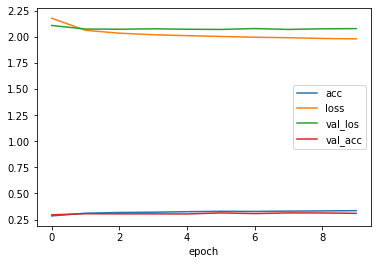

In [30]:
import numpy as np
from sklearn import datasets
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Activation, LeakyReLU
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from sklearn.preprocessing import OneHotEncoder

# create object of Ordinalencoding
# encoder= ce.OrdinalEncoder(cols=['二連複'], return_df=True,
#                            mapping=[{'col':'二連複',
#                                      'mapping':{12:0, 13:1, 14:2, 15:3, 16:4,
#                                                 23:5, 24:6, 25:7, 26:8, 34:9,
#                                                 35:10, 36:11, 45:12, 46:13, 56:14}}])
labels = [12, 13, 14, 15, 16, 23, 24, 25, 26, 34, 35, 36, 45, 46, 56]
encoder= OneHotEncoder(sparse=False, categories=[labels])
sscaler = preprocessing.StandardScaler()

                          
Y_train_cat = encoder.fit_transform(Y_train.to_numpy())
Y_test_cat = encoder.fit_transform(Y_test.to_numpy())

s = sscaler.fit(Y2_train)
Y2_train_sd = sscaler.transform(Y2_train)
Y2_test_sd = sscaler.transform(Y2_test)



#### below is sample https://stackoverflow.com/questions/54847320/classification-and-regression-using-the-same-neural-network-using-keras
# mdl = Sequential()
# mdl.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
# mdl.add(Dense(200, activation='relu'))
# mdl.add(Dense(100, activation='relu'))
# mdl.add(Dense(6, activation='softmax'))
# inputs = Input(shape=(X_train.shape[1],))
# layer1 = Dense(100, activation='relu')(inputs)
# layer2 = Dense(200, activation='relu')(layer1)
# layer3 = Dense(100, activation='relu')(layer2)
# classifier = Dense(6, activation='softmax')(layer3)
# mdl = Model(inputs=inputs, outputs=classifier)

# model = Sequential()
# model.add(Dense(20, input_dim=X_train.shape[1]))    # 隠れ層に20ノード, 全結合
# model.add(Activation("sigmoid"))    # 活性化関数はsigmoid
# model.add(Dense(Y_train_cat.shape[1])) # 出力層6ノード,全結合
# model.add(Activation("sigmoid"))

inputs = Input(shape=(X_train.shape[1],))
#layer1 = Dense(20, activation='relu')(inputs)
LR0 = LeakyReLU(alpha=0.1)(inputs)
layer1 = Dense(20)(LR0)
# LR1 = LeakyReLU(alpha=0.1)(layer1)
# layer2 = Dense(10)(LR1)
LR2 = LeakyReLU(alpha=0.1)(layer1)
classifier1 = Dense(Y_train_cat.shape[1], activation='softmax', name='classifier1')(LR2)
#regression1 = Dense(Y2_train_sd.shape[1], activation='linear', name='regression1')(LR2)
model = Model(inputs=inputs, outputs=[classifier1])
#model = Model(inputs=inputs, outputs=[classifier1, regression1])

losses = {'classifier1': 'categorical_crossentropy'}
#losses = {'classifier1': 'categorical_crossentropy', 'regression1': 'mse'}

model.compile(loss=losses,   # 誤差関数
              optimizer='adam',     # 最適化手法
              metrics=['accuracy'],
              loss_weights=[1.0])


########## エポック数 ##########
epoch = 10
history = model.fit(X_train, {'classifier1':Y_train_cat}, nb_epoch=epoch, batch_size=32, validation_split=0.1) # 学習
#history = model.fit(X_train, {'classifier1':Y_train_cat, 'regression1':Y2_train_sd}, nb_epoch=epoch, batch_size=32, validation_split=0.1) # 学習

# 学習過程のプロット
#plt.plot(history.epoch, history.history['classifier1_acc'], label='classifier1_acc')
plt.plot(history.epoch, history.history['acc'], label='acc')
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_los')
#plt.plot(history.epoch, history.history['val_classifier1_acc'], label='val_classifier1_acc')
plt.plot(history.epoch, history.history['val_acc'], label='val_acc')
plt.xlabel("epoch")
plt.legend()

# 学習できているか見てみる
print("====================================")
print("-----------correct answer-----------")
print(Y_test_cat[0])
print(Y_test_cat[10])
print("-----------predict answer-----------")
print(np.round(model.predict(X_test)[0][0]))
print(np.round(model.predict(X_test)[0][10]))

probability = model.predict(X_test)
#probability = model.predict(X_test)[0]
Y_pred_arg = probability.argmax(axis=1)
Y_pred = [int(labels[i]) for i in Y_pred_arg]

clf_nn = model

In [31]:
Y_train_cat = encoder.fit_transform(Y_train.to_numpy())
Y_train_cat[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Light GBM

In [32]:
Y_train_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
!pip install lightgbm
!pip install xgboost

You should consider upgrading via the '/opt/aapf/1.3.10/python_env/py3/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/aapf/1.3.10/python_env/py3/bin/python3 -m pip install --upgrade pip' command.


In [34]:
# import lightgbm as lgb
# import pandas as pd
# import numpy as np
# from tensorflow.keras.datasets import mnist
# from sklearn.model_selection import train_test_split

# # Kerasに付属の手書き数字画像データをダウンロード
# np.random.seed(0)
# (X_train, labels_train), (X_test, labels_test) = mnist.load_data()

# # 各画像は行列なので1次元に変換→X_train,X_validation,X_testを上書き
# X_train = X_train.reshape(-1,784)
# X_test = X_test.reshape(-1,784)

# #正規化
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

# # 訓練・テストデータの設定
# train_data = lgb.Dataset(X_train, label=labels_train)
# eval_data = lgb.Dataset(X_test, label=labels_test, reference= train_data)

# params = {
# 'task': 'train',
# 'boosting_type': 'gbdt',
# 'objective': 'multiclass',
# 'num_class': 10,
# 'verbose': 2,
# }

# gbm = lgb.train(
# params,
# train_data,
# valid_sets=eval_data,
# num_boost_round=50,
# verbose_eval=5,
# )

# preds = gbm.predict(X_test)
# preds
# y_pred = []
# for x in preds:
#   y_pred.append(np.argmax(x))

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# accuracy_score(labels_test, y_pred)

In [35]:
# import lightgbm as lgb
# import pandas as pd
# import numpy as np
# from tensorflow.keras.datasets import mnist
# from sklearn.model_selection import train_test_split
# #from lightgbm import LGBMClassifier

# # lgb = LGBMClassifier(
# #     max_bin = 63)
# #     #reg_alpha = 0.2,
# #     #reg_lambda = 0.4)
    
    
# # 訓練・テストデータの設定
# train_data = lgb.Dataset(X_train, label=np.argmax(Y_train_cat, axis=1))
# eval_data = lgb.Dataset(X_test, label=np.argmax(Y_test_cat, axis=1))

# params = {
# 'task': 'train',
# 'boosting_type': 'gbdt',
# 'objective': 'multiclass',
# 'num_class': 15,
# 'verbose': 2,
# 'max_bin': 31,
# 'bagging_fraction': 0.3,
# 'feature_fraction': 0.1,
# }

# gbm = lgb.train(
# params,
# train_data,
# valid_sets=eval_data,
# num_boost_round=15,
# verbose_eval=5,
# )

# preds = gbm.predict(X_test)
# y_pred = []
# for x in preds:
#   y_pred.append(np.argmax(x))

# labels_test = np.argmax(Y_test_cat, axis=1)

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# accuracy_score(labels_test, y_pred)

In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# xgboostモデルの作成
clf_xgb = xgb.XGBClassifier()

# ハイパーパラメータ探索
clf_cv = GridSearchCV(clf_xgb, {'max_depth': [1, 2, 3], 'n_estimators': [50, 100, 200]}, verbose=3)
clf_cv.fit(X_train[0:500], Y_train[0:500])
print(clf_cv.best_params_)
print(clf_cv.best_score_)

# 改めて最適パラメータで学習
clf_xgb = xgb.XGBClassifier(**clf_cv.best_params_)
clf_xgb.fit(X_train, Y_train)

# 学習モデルの保存、読み込み
# import pickle
# pickle.dump(clf, open("model.pkl", "wb"))
# clf = pickle.load(open("model.pkl", "rb"))

# 学習モデルの評価
pred = clf_xgb.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[09:02:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ........ max_depth=1, n_estimators=50, score=0.270, total=  20.6s
[CV] max_depth=1, n_estimators=50 ....................................
[09:02:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.6s remaining:    0.0s


[CV] ........ max_depth=1, n_estimators=50, score=0.270, total=  29.3s
[CV] max_depth=1, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.9s remaining:    0.0s


[09:03:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ........ max_depth=1, n_estimators=50, score=0.220, total=  15.3s
[CV] max_depth=1, n_estimators=50 ....................................
[09:03:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ........ max_depth=1, n_estimators=50, score=0.240, total=   0.5s
[CV] max_depth=1, n_estimators=50 ....................................
[09:03:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.7min finished


{'max_depth': 2, 'n_estimators': 50}
0.266
[09:05:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1047  310  137   24   13   13    6    3    1    3    1    0    0    1
     0]
 [ 493  509  110   27   13   15    3    2    0    2    0    0    1    1
     0]
 [ 424  200  213   20    9    7    6    3    0    4    0    0    1    0
     0]
 [ 253  119   44   33    7    1    1    4    0    2    0    0    0    0
     1]
 [ 168   78   29    8   22    1    1    3    2    0    0    0    0    0
     0]
 [ 179  104   15    0    4   19    6    5    0    1    0    1    0    0
     0]
 [ 127   32   25    3    4    5    9    4    0    3    1    0    3    0
     0]
 [ 104   28    8   12    2    7    3   10    0    1    0    1    0    0
     0]
 [  63   16    7    0    4    1    3    2    1    0    0    0   

In [37]:
probability = clf_xgb.predict_proba(X_test) 
print(probability)

labels = ['12', '13', '14', '15', '16', '23', '24', '25', '26', '34', '35', '36', '45', '46', '56']

[[0.05225953 0.18508646 0.08169534 ... 0.05926882 0.04292806 0.03791947]
 [0.2600322  0.03509844 0.04588565 ... 0.04419196 0.01343035 0.02697981]
 [0.2276744  0.27820763 0.15012135 ... 0.04431475 0.01344789 0.00513755]
 ...
 [0.34190863 0.28746727 0.14745207 ... 0.01528307 0.00912498 0.00273778]
 [0.53405136 0.09357892 0.13072881 ... 0.01001198 0.01064936 0.00235811]
 [0.21911651 0.15525687 0.20863996 ... 0.07696085 0.00857573 0.00691245]]


In [38]:
Y_pred = pred

In [39]:
print('########## XGBoost ##########')
print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print(classification_report(Y_test, Y_pred))

########## XGBoost ##########
confusion matrix = 
 [[1047  310  137   24   13   13    6    3    1    3    1    0    0    1
     0]
 [ 493  509  110   27   13   15    3    2    0    2    0    0    1    1
     0]
 [ 424  200  213   20    9    7    6    3    0    4    0    0    1    0
     0]
 [ 253  119   44   33    7    1    1    4    0    2    0    0    0    0
     1]
 [ 168   78   29    8   22    1    1    3    2    0    0    0    0    0
     0]
 [ 179  104   15    0    4   19    6    5    0    1    0    1    0    0
     0]
 [ 127   32   25    3    4    5    9    4    0    3    1    0    3    0
     0]
 [ 104   28    8   12    2    7    3   10    0    1    0    1    0    0
     0]
 [  63   16    7    0    4    1    3    2    1    0    0    0    0    0
     1]
 [  74   81   33    2    2    4    6    3    0    6    1    0    1    0
     0]
 [  65   58    7   14    2    8    1    2    2    2    0    0    0    0
     0]
 [  33   38    4    2    7    3    1    0    0    1    0    2    0   

########## 12 ##########


proba  Y_test  arg
0     0.075959      36   11
1     0.278997      24    6
2     0.143179      45   12
3     0.340838      12    0
4     0.322937      45   12
...        ...     ...  ...
6043  0.274539      12    0
6044  0.174009      13    1
6045  0.360238      15    3
6046  0.542637      12    0
6047  0.169485      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
2    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
3     110.0  110.0  110.0  110.0  110.0  110.0  110.0  110.0  110.0  110.0   
4    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043  150.0  150.0  150.0  150.0  150.0  150.0  150.0  150.0  150.0  150.0   
6044 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6045 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6046   30.0   30.0   30.0   30.0   30.0   30.0   30.0   30.0   30.0   30.0   
6047 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.585   -250.0
0.590    -70.0
0.595    100.0
0.600    150.0
0.605    120.0
0.610    190.0
0.615    350.0
0.620    250.0
0.625    250.0
0.630    130.0
0.635     70.0
0.640     70.0
0.645     60.0
dtype: float64

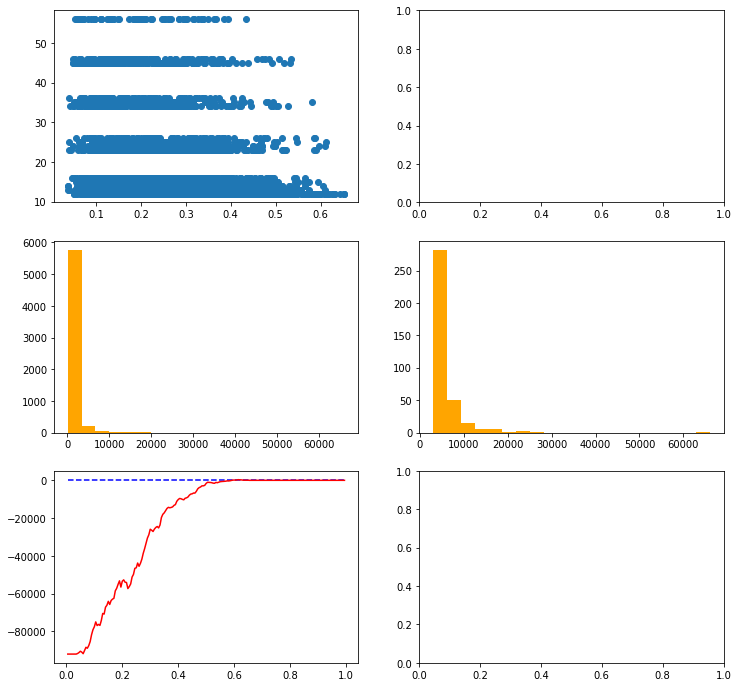

0.615
########## 13 ##########


proba  Y_test  arg
0     0.138996      36   11
1     0.042694      24    6
2     0.284613      45   12
3     0.161109      12    0
4     0.066829      45   12
...        ...     ...  ...
6043  0.087320      12    0
6044  0.307475      13    1
6045  0.280045      15    3
6046  0.096269      12    0
6047  0.147902      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN   
2    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
3    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
4    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6044  160.0  160.0  160.0  160.0  160.0  160.0  160.0  160.0  160.0  160.0   
6045 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6046 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6047 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.470   -610.0
0.475   -640.0
0.480   -810.0
0.485   -570.0
0.490   -160.0
0.495    -80.0
0.500    220.0
0.505    -30.0
0.510   -250.0
0.515   -260.0
0.520   -230.0
0.525   -370.0
0.530   -270.0
dtype: float64

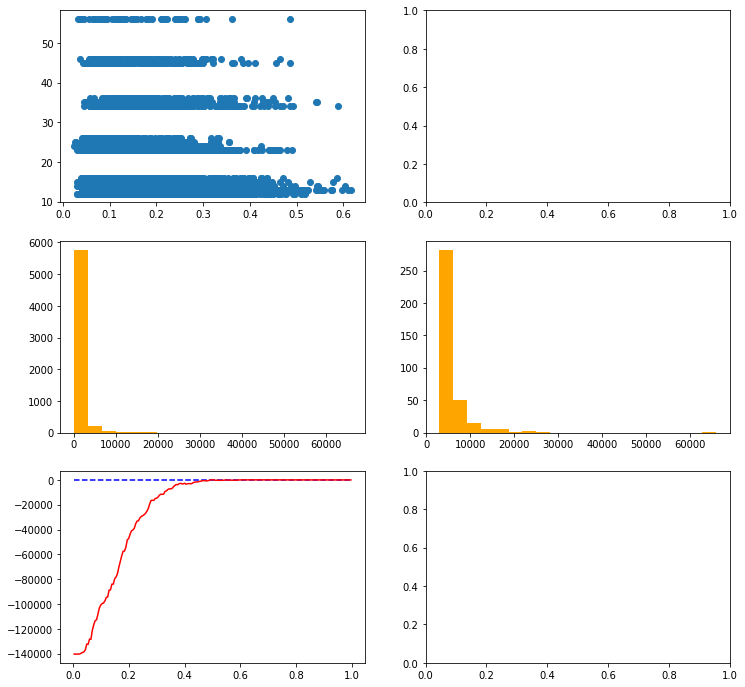

0.5
########## 14 ##########


proba  Y_test  arg
0     0.081902      36   11
1     0.030769      24    6
2     0.147918      45   12
3     0.095961      12    0
4     0.063777      45   12
...        ...     ...  ...
6043  0.057247      12    0
6044  0.282200      13    1
6045  0.171060      15    3
6046  0.120356      12    0
6047  0.266798      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
2    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
3    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
4    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6044 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6045 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6046 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6047 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.475     50.0
0.480    150.0
0.485    210.0
0.490    -70.0
0.495    -70.0
0.500    130.0
0.505    330.0
0.510    200.0
0.515    180.0
0.520    180.0
0.525    180.0
0.530    180.0
0.535     40.0
dtype: float64

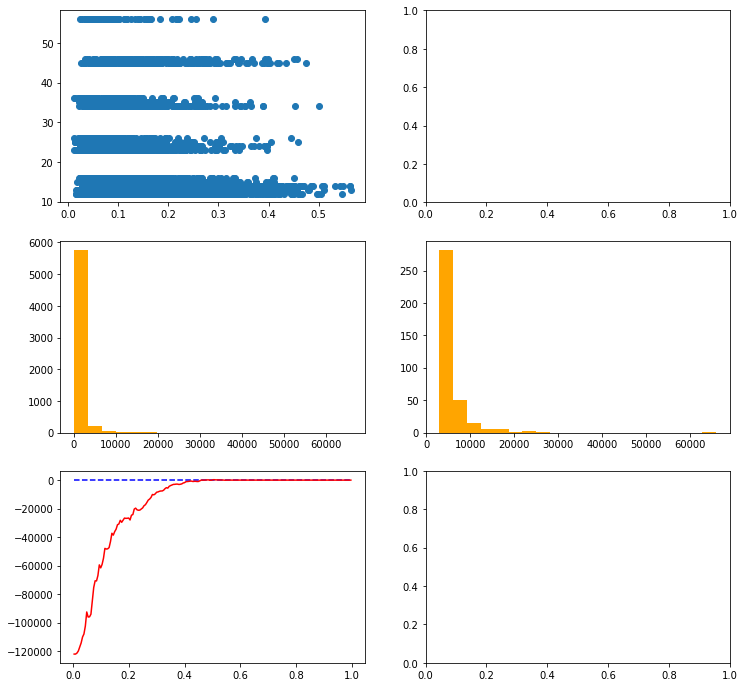

0.505
########## 15 ##########


proba  Y_test  arg
0     0.121560      36   11
1     0.031550      24    6
2     0.116568      45   12
3     0.114551      12    0
4     0.055332      45   12
...        ...     ...  ...
6043  0.125736      12    0
6044  0.028984      13    1
6045  0.061821      15    3
6046  0.048769      12    0
6047  0.062322      24    6

[6048 rows x 3 columns]

       0.005   0.010   0.015   0.020   0.025   0.030   0.035   0.040   0.045  \
0     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
1     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0     NaN     NaN     NaN   
2     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
3     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
4     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6043  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
6044  -100.0  -100.0  -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN   
6045  1920.0  1920.0  1920.0  1920.0  1920.0  1920.0  1920.0  1920.0  1920.0   
6046  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
6047  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   

       0.050  ...  0.950  0.955  0.960 

0.410   -340.0
0.415   -240.0
0.420    -40.0
0.425    -40.0
0.430    -40.0
0.435     60.0
0.440    160.0
0.445    160.0
0.450    160.0
0.455    -20.0
0.460    -20.0
0.465     80.0
dtype: float64

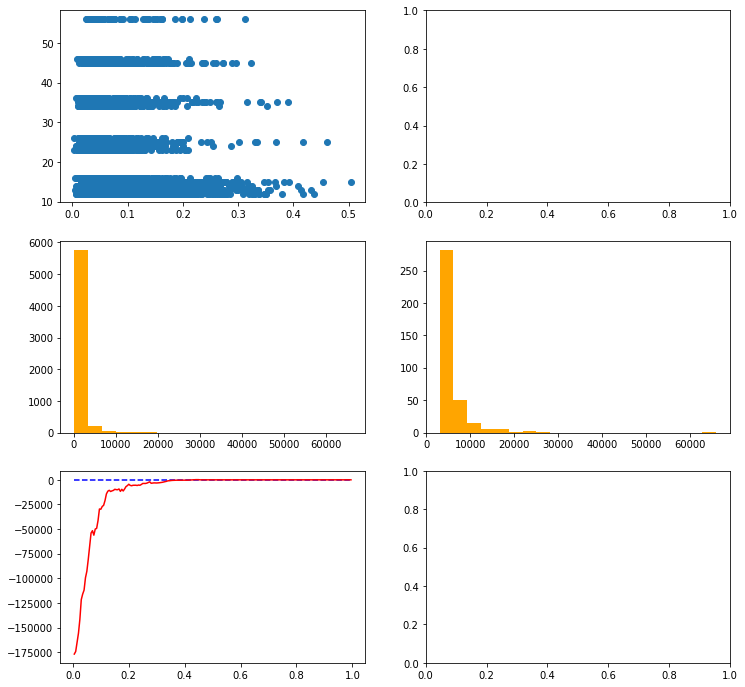

0.44
########## 16 ##########


proba  Y_test  arg
0     0.034790      36   11
1     0.051952      24    6
2     0.033693      45   12
3     0.090862      12    0
4     0.005541      45   12
...        ...     ...  ...
6043  0.021066      12    0
6044  0.024237      13    1
6045  0.031449      15    3
6046  0.017796      12    0
6047  0.032797      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
2    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
3    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
4    -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
6044 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
6045 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
6046 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6047 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.350   -160.0
0.355   -160.0
0.360   -120.0
0.365   -120.0
0.370   -120.0
0.375    -20.0
0.380     80.0
0.385     80.0
0.390     80.0
0.395     80.0
0.400     80.0
0.405      0.0
0.410      0.0
dtype: float64

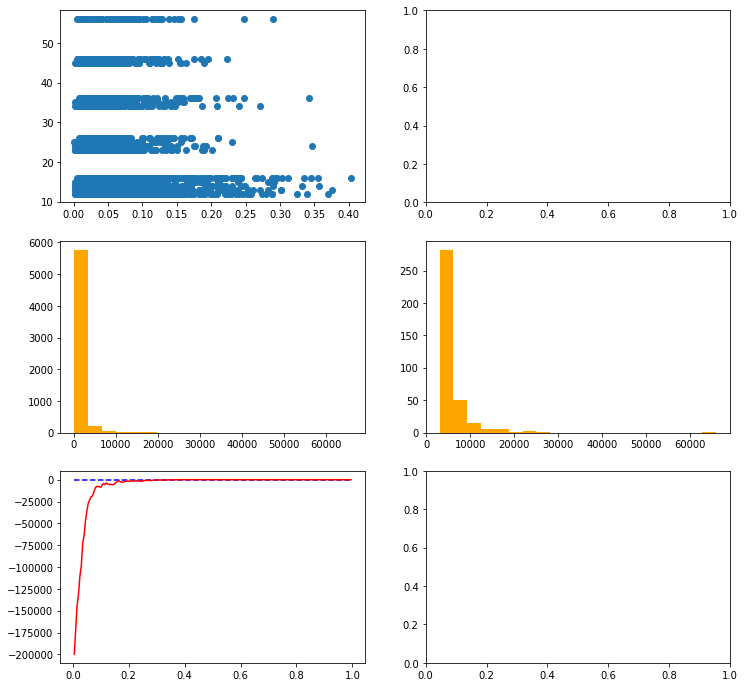

0.38
########## 23 ##########


proba  Y_test  arg
0     0.050284      36   11
1     0.056285      24    6
2     0.048160      45   12
3     0.033447      12    0
4     0.094262      45   12
...        ...     ...  ...
6043  0.067051      12    0
6044  0.032052      13    1
6045  0.027221      15    3
6046  0.031241      12    0
6047  0.018650      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
2    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN   
3    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
4    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6044 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
6045 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   
6046 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
6047 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.060   -18360.0
0.065   -13540.0
0.070    -4600.0
0.075      980.0
0.080     1780.0
0.085     2150.0
0.090    -2330.0
0.095    -4650.0
0.100    -2040.0
0.105    -6270.0
0.110    -7980.0
0.115    -8040.0
dtype: float64

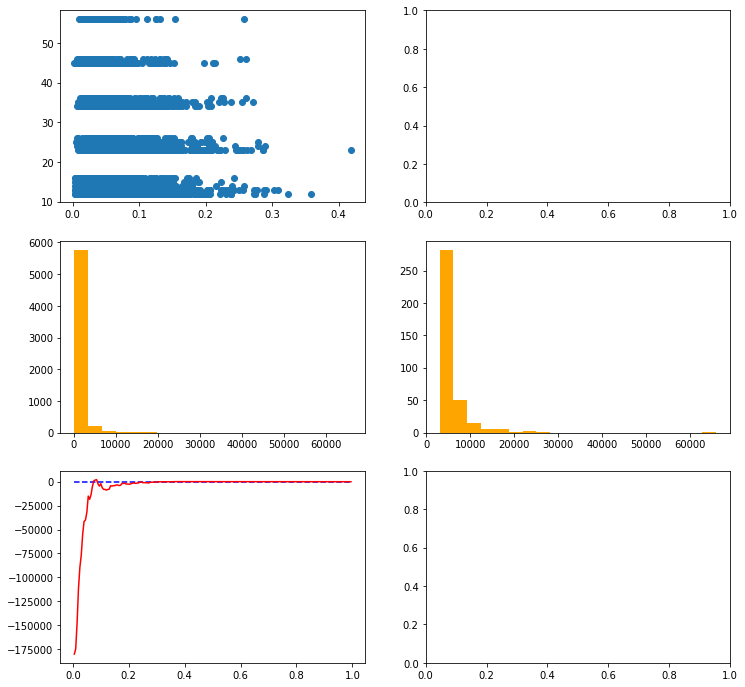

0.085
########## 24 ##########


proba  Y_test  arg
0     0.054834      36   11
1     0.117812      24    6
2     0.019936      45   12
3     0.020104      12    0
4     0.103529      45   12
...        ...     ...  ...
6043  0.046950      12    0
6044  0.022395      13    1
6045  0.008015      15    3
6046  0.044313      12    0
6047  0.083074      24    6

[6048 rows x 3 columns]

       0.005   0.010   0.015   0.020   0.025   0.030   0.035   0.040   0.045  \
0     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
1      520.0   520.0   520.0   520.0   520.0   520.0   520.0   520.0   520.0   
2     -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN     NaN     NaN   
3     -100.0  -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN     NaN   
4     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6043  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
6044  -100.0  -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN     NaN   
6045  -100.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6046  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0     NaN   
6047  1100.0  1100.0  1100.0  1100.0  1100.0  1100.0  1100.0  1100.0  1100.0   

       0.050  ...  0.950  0.955  0.960 

0.285   -210.0
0.290    -10.0
0.295     90.0
0.300     90.0
0.305     90.0
0.310     90.0
0.315    190.0
0.320    190.0
0.325    190.0
0.330    190.0
0.335    190.0
0.340    190.0
dtype: float64

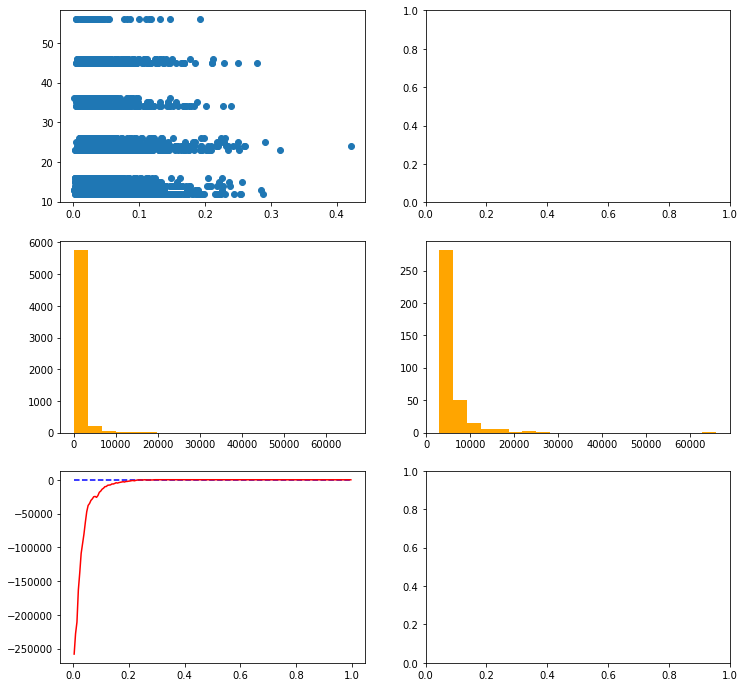

0.315
########## 25 ##########


proba  Y_test  arg
0     0.067709      36   11
1     0.170667      24    6
2     0.017770      45   12
3     0.030264      12    0
4     0.172228      45   12
...        ...     ...  ...
6043  0.129887      12    0
6044  0.005917      13    1
6045  0.006720      15    3
6046  0.021577      12    0
6047  0.025631      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
2    -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN   
4    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6044 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6045 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6046 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
6047 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.150    1030.0
0.155    2030.0
0.160    2430.0
0.165    2780.0
0.170    2490.0
0.175    3790.0
0.180    3050.0
0.185    2670.0
0.190    3130.0
0.195    3230.0
0.200    3470.0
0.205    2970.0
dtype: float64

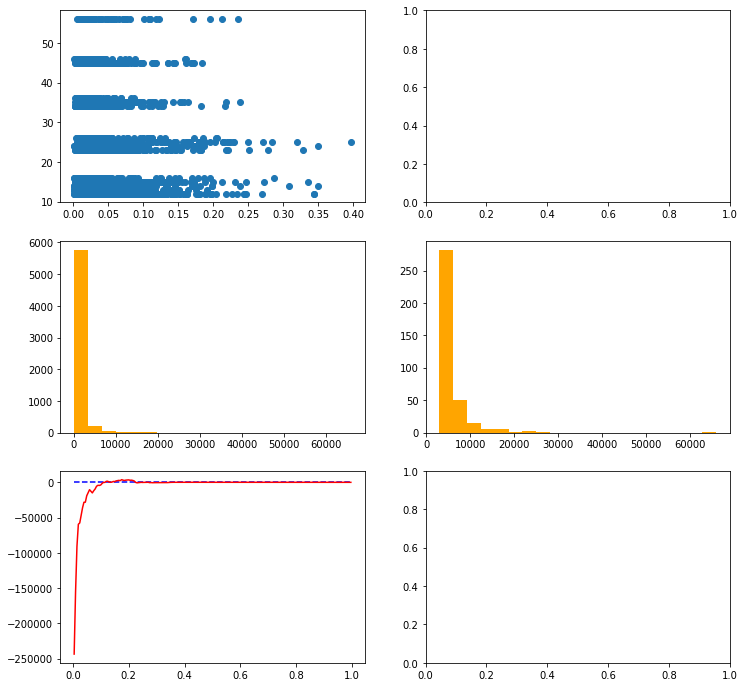

0.17500000000000002
########## 26 ##########


proba  Y_test  arg
0     0.017568      36   11
1     0.066387      24    6
2     0.007871      45   12
3     0.012649      12    0
4     0.024341      45   12
...        ...     ...  ...
6043  0.036975      12    0
6044  0.002628      13    1
6045  0.003534      15    3
6046  0.018002      12    0
6047  0.004526      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
2    -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN   
6044    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6045    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6046 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6047    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.090   -4470.0
0.095   -3670.0
0.100   -2270.0
0.105   -1520.0
0.110   -1180.0
0.115    -520.0
0.120      80.0
0.125    -880.0
0.130    -580.0
0.135    -580.0
0.140    -280.0
0.145    -700.0
0.150    -500.0
dtype: float64

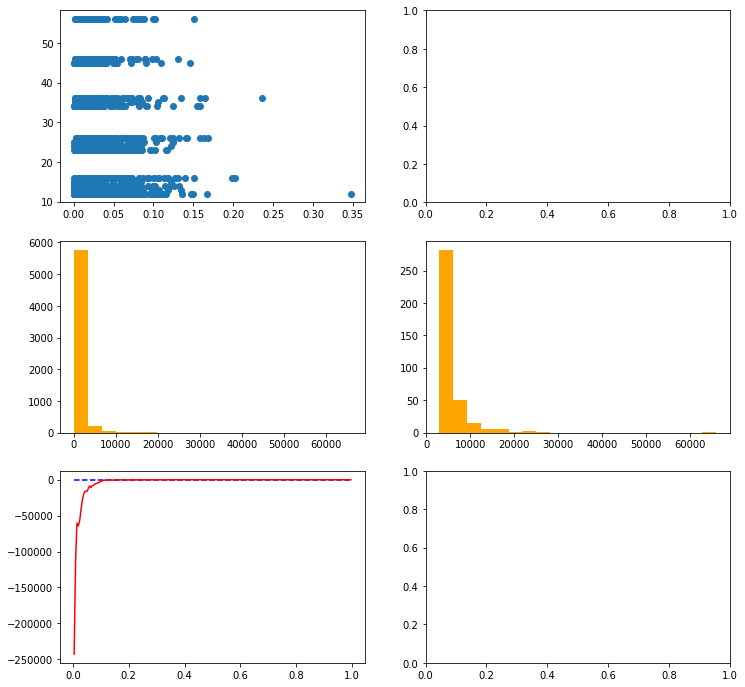

0.12
########## 34 ##########


proba  Y_test  arg
0     0.083155      36   11
1     0.015834      24    6
2     0.056738      45   12
3     0.008379      12    0
4     0.011510      45   12
...        ...     ...  ...
6043  0.012278      12    0
6044  0.065056      13    1
6045  0.019477      15    3
6046  0.025906      12    0
6047  0.065463      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
3    -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6044 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
6045 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6046 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   
6047 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.280   -200.0
0.285   -200.0
0.290   -200.0
0.295   -200.0
0.300   -200.0
0.305   -100.0
0.310      0.0
0.315      0.0
0.320      0.0
0.325      0.0
0.330      0.0
0.335      0.0
dtype: float64

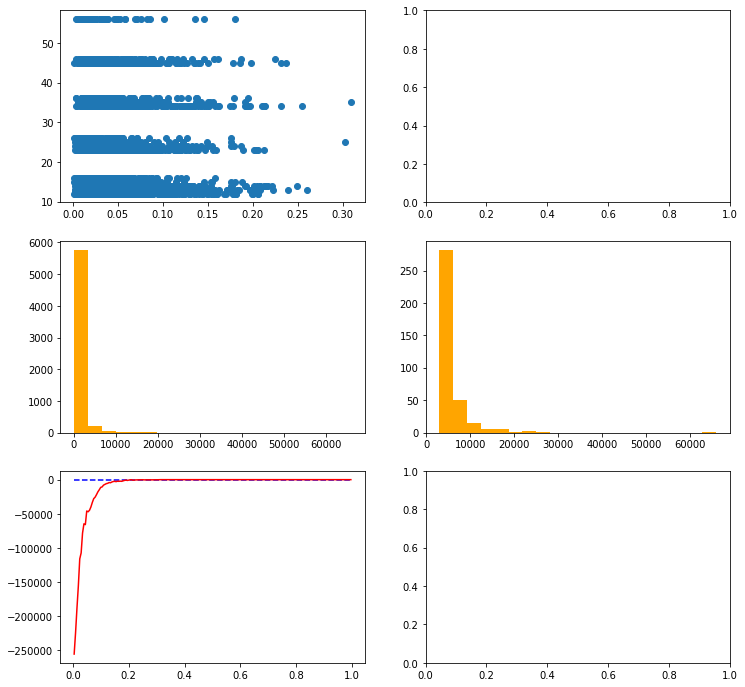

1.0
########## 35 ##########


proba  Y_test  arg
0     0.105282      36   11
1     0.022325      24    6
2     0.029568      45   12
3     0.018255      12    0
4     0.023854      45   12
...        ...     ...  ...
6043  0.036976      12    0
6044  0.013424      13    1
6045  0.012806      15    3
6046  0.009383      12    0
6047  0.022947      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
1    -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
2    -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   
3    -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN   
6044 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6045 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6046 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6047 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.170   -130.0
0.175    -80.0
0.180    -80.0
0.185    -80.0
0.190    -80.0
0.195    -80.0
0.200     20.0
0.205     20.0
0.210     20.0
0.215     20.0
0.220   -100.0
0.225   -100.0
0.230   -100.0
dtype: float64

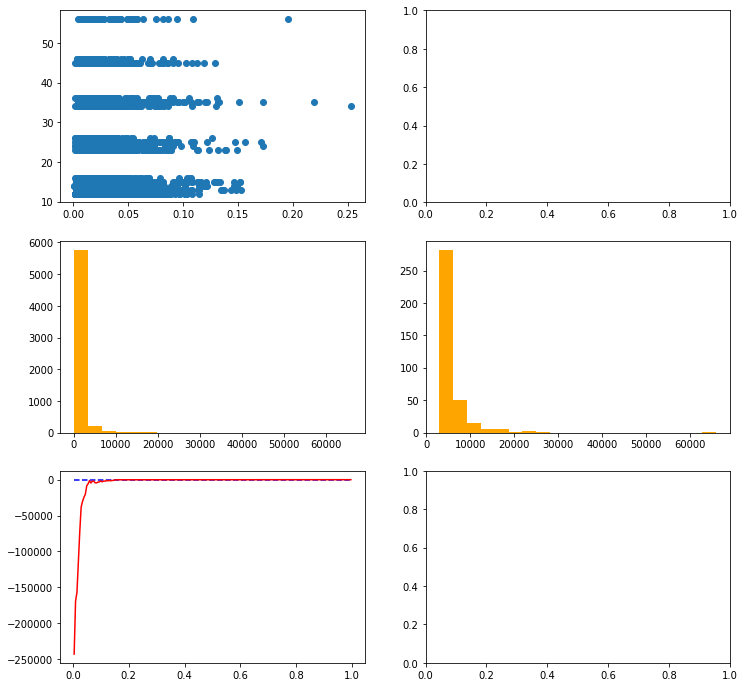

0.2
########## 36 ##########


proba  Y_test  arg
0     0.026552      36   11
1     0.018885      24    6
2     0.017552      45   12
3     0.008106      12    0
4     0.004194      45   12
...        ...     ...  ...
6043  0.009449      12    0
6044  0.007526      13    1
6045  0.002150      15    3
6046  0.003799      12    0
6047  0.007105      24    6

[6048 rows x 3 columns]

       0.005   0.010   0.015   0.020   0.025  0.030  0.035  0.040  0.045  \
0     1640.0  1640.0  1640.0  1640.0  1640.0    NaN    NaN    NaN    NaN   
1     -100.0  -100.0  -100.0     NaN     NaN    NaN    NaN    NaN    NaN   
2     -100.0  -100.0  -100.0     NaN     NaN    NaN    NaN    NaN    NaN   
3     -100.0     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
4        NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
...      ...     ...     ...     ...     ...    ...    ...    ...    ...   
6043  -100.0     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
6044  -100.0     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
6045     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
6046     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   
6047  -100.0     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN   

      0.050  ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.985  \
0       NaN

0.115    -400.0
0.120     300.0
0.125     900.0
0.130     800.0
0.135    1200.0
0.140    1310.0
0.145     870.0
0.150     440.0
0.155     540.0
0.160     360.0
0.165     460.0
0.170     560.0
dtype: float64

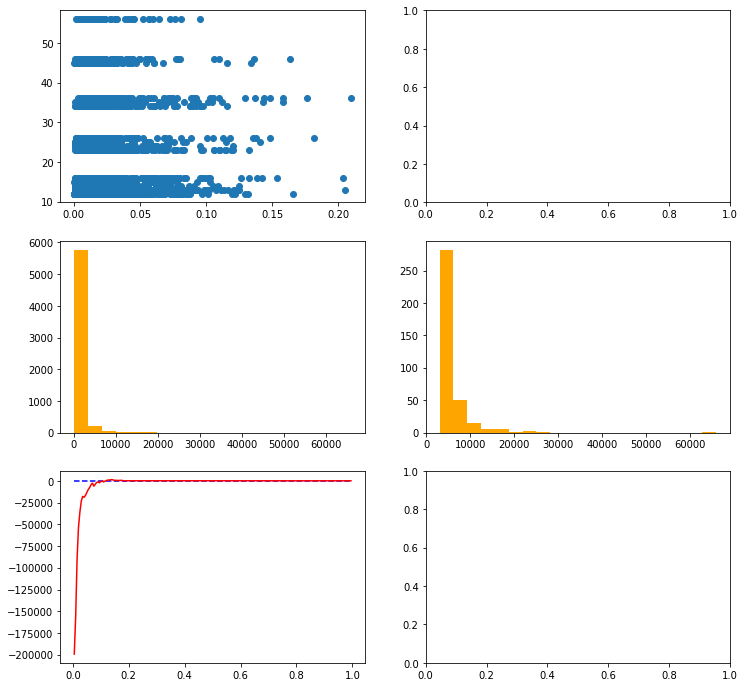

0.14
########## 45 ##########


proba  Y_test  arg
0     0.084543      36   11
1     0.027439      24    6
2     0.046440      45   12
3     0.029827      12    0
4     0.032861      45   12
...        ...     ...  ...
6043  0.052193      12    0
6044  0.018082      13    1
6045  0.010952      15    3
6046  0.013685      12    0
6047  0.072414      24    6

[6048 rows x 3 columns]

       0.005   0.010   0.015   0.020   0.025   0.030   0.035   0.040   0.045  \
0     -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
1     -100.0  -100.0  -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN   
2     2190.0  2190.0  2190.0  2190.0  2190.0  2190.0  2190.0  2190.0  2190.0   
3     -100.0  -100.0  -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN   
4     1180.0  1180.0  1180.0  1180.0  1180.0  1180.0     NaN     NaN     NaN   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6043  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   
6044  -100.0  -100.0  -100.0     NaN     NaN     NaN     NaN     NaN     NaN   
6045  -100.0  -100.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6046  -100.0  -100.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6047  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0  -100.0   

      0.050  ...  0.950  0.955  0.960  

0.095   -1070.0
0.100     470.0
0.105     850.0
0.110     140.0
0.115    1000.0
0.120    1990.0
0.125    2430.0
0.130    1250.0
0.135     520.0
0.140     390.0
0.145     460.0
0.150     760.0
0.155    1060.0
dtype: float64

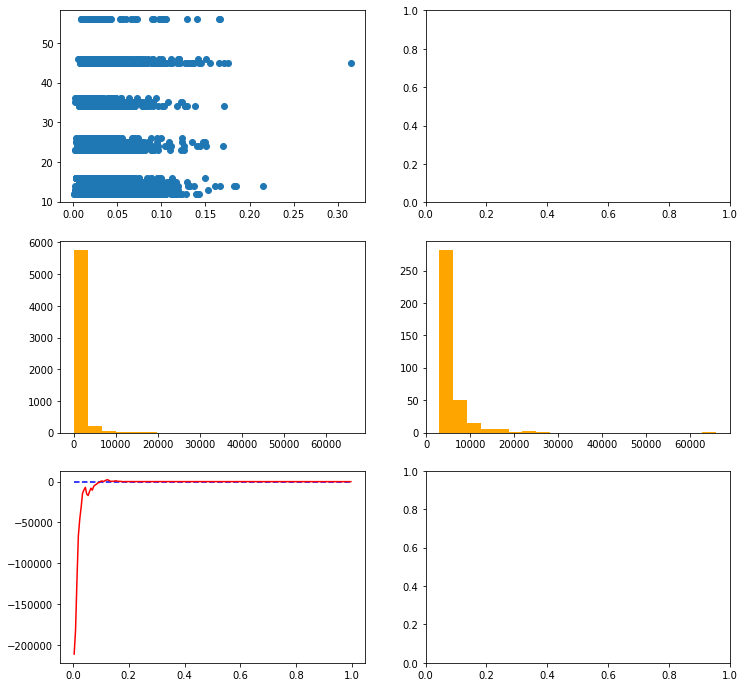

0.125
########## 46 ##########


proba  Y_test  arg
0     0.028773      36   11
1     0.017596      24    6
2     0.021223      45   12
3     0.013710      12    0
4     0.009323      45   12
...        ...     ...  ...
6043  0.015598      12    0
6044  0.012578      13    1
6045  0.003641      15    3
6046  0.004790      12    0
6047  0.011717      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   
1    -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2    -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
3    -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4    -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6044 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6045    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6046    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6047 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.185   -100.0
0.190   -100.0
0.195   -100.0
0.200   -100.0
0.205   -100.0
0.210   -100.0
0.215      0.0
0.220      0.0
0.225      0.0
0.230      0.0
0.235      0.0
0.240      0.0
0.245      0.0
dtype: float64

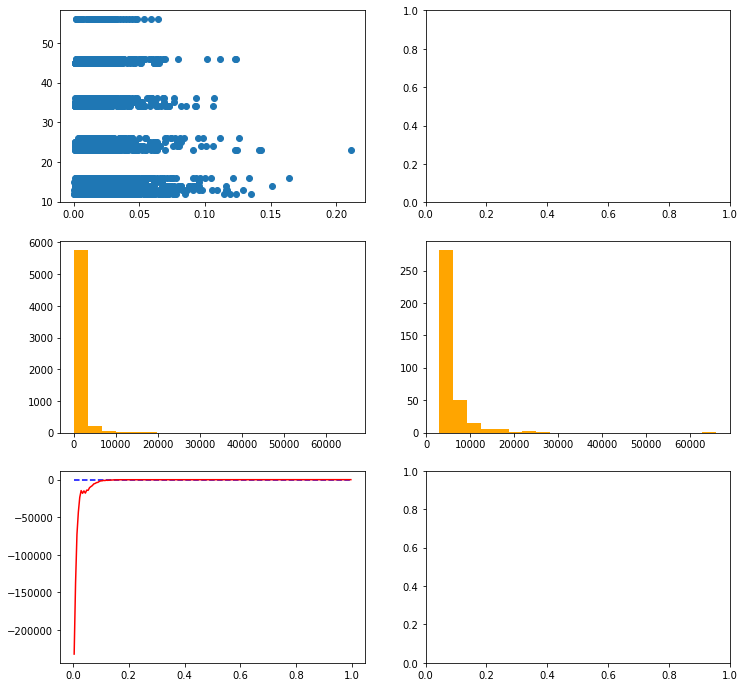

1.0
########## 56 ##########


proba  Y_test  arg
0     0.028093      36   11
1     0.050807      24    6
2     0.008771      45   12
3     0.021939      12    0
4     0.009483      45   12
...        ...     ...  ...
6043  0.026735      12    0
6044  0.003438      13    1
6045  0.000870      15    3
6046  0.001479      12    0
6047  0.009168      24    6

[6048 rows x 3 columns]

      0.005  0.010  0.015  0.020  0.025  0.030  0.035  0.040  0.045  0.050  \
0    -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   
1    -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0 -100.0   
2    -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3    -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN    NaN   
4    -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6043 -100.0 -100.0 -100.0 -100.0 -100.0    NaN    NaN    NaN    NaN    NaN   
6044    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6045    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6046    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6047 -100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

      ...  0.950  0.955  0.960  0.965  0.970  0.975  0.980  0.9

0.110   -110.0
0.115   -220.0
0.120   -220.0
0.125   -120.0
0.130   -120.0
0.135     80.0
0.140     80.0
0.145     80.0
0.150     80.0
0.155     80.0
0.160      0.0
0.165      0.0
dtype: float64

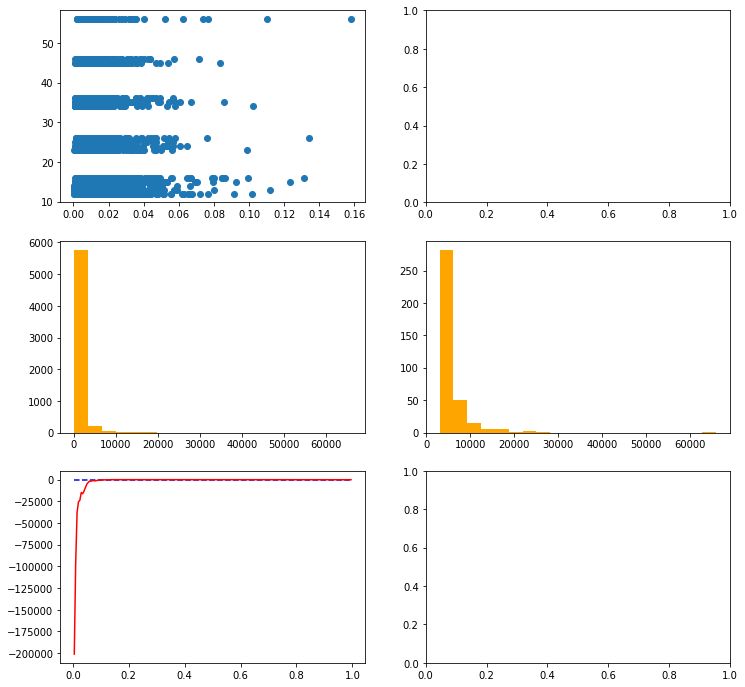

0.135
[0.615, 0.5, 0.505, 0.44, 0.38, 0.085, 0.315, 0.17500000000000002, 0.12, 1.0, 0.2, 0.14, 0.125, 1.0, 0.135]


In [40]:
## proba:予測確率（横に１号艇、２号艇、…、６号艇）
## x : テストデータの説明変数（['TANRFD1']）があれば良い
## Y :  テストデータの正解ラベル
## result:１着号艇
def simlation_nirenpuku(probability, X, Y, Z, haito, labels, no=0):
    df1 = pd.DataFrame([])
    #### no の示す舟券の的中予想確率
    df1['proba'] = probability[:,no]
    #### 実際の結果
    df1['Y_test'] = Y.to_numpy()
#    df1['arg'] = [labels.index(int(n)) for n in Y.to_numpy()[:,0]]
    df1['arg'] = [labels.index(str(n)) for n in Y.to_numpy()[:,0]]
    
    fig, axes= plt.subplots(3, 2, figsize=(12,12))
    display(df1)
    axes[0][0].scatter(df1['proba'], df1['Y_test'])

    #### これ以上の予測確率だったら購入する確率のしきい値
    threshold = np.array([i * 0.005 for i in range(1,200)])
    ta = np.zeros((threshold.shape[0], df1.shape[0]))
    ta[:,:] = threshold[:,None]
    ta = ta.T

    #### no号艇の１着予測確率
    pa = np.zeros((threshold.shape[0], df1.shape[0]))
    pa[:,:] = df1['proba'].to_numpy()[None,:]
    pa = pa.T

    #### 結果がno号艇１着かどうか
    ra = np.zeros((threshold.shape[0], df1.shape[0]))
    ra[:,:] = df1['arg'].to_numpy()[None,:]
    ra = ra.T
    ra = (ra == no)

    #### 舟券配当
    tanrfd1a = np.zeros((threshold.shape[0], df1.shape[0]))
    tanrfd1a[:,:] = Z[haito].to_numpy()[None,:]
    tanrfd1a = tanrfd1a.T
    
    #### 単勝配当の図
    axes[1][0].hist(Z[haito], bins=20, color='orange')
    axes[1][1].hist(Z[haito][Z[haito] > 3000], bins=20, color='orange')
    
    #### "pa - ta > 0" で購入意思
    df2 = pd.DataFrame((((pa - ta > 0) & ra) * 1 * tanrfd1a) - (((pa - ta) > 0) * 100), columns=threshold)
    #display(df2)
    print(df2[(df2>0)|(df2<0)])
    display(df2.sum()[df2.sum().idxmax()-0.03:df2.sum().idxmax()+0.03])
    axes[2][0].plot(threshold, df2.sum(), color='red')
    axes[2][0].hlines([0], threshold[0], threshold[-1], 'blue', linestyles='dashed') 
    
    plt.show()
    
    # 購入する確率しきい値を返す
    return df2.sum().idxmax() if df2.sum()[df2.sum().idxmax()] > 0 else 1.00

    
    
rcParams['figure.figsize'] = 12, 15
haito = 'RFUKRFD1'
Z_test = pd.merge(key_array_test, race_wm[['RCOURSECD', 'OPDT', 'RNO', haito]].drop_duplicates(), on=['RCOURSECD', 'OPDT', 'RNO'], how='left')[[haito]]
Z_test = Z_test.astype(int)
thresholds = []

#### アンサンブル
prob_rf = clf_rf.predict_proba(X_test)
prob_lr = clf_lr.predict_proba(X_test)
prob_nn = clf_nn.predict(X_test)
prob_xgb = clf_xgb.predict_proba(X_test)

probability = (prob_rf + prob_lr + prob_nn + prob_xgb) / 4
# probability = (prob_rf + prob_lr + prob_nn) / 3

for i in range(0,15):
    print('########## ' + str(labels[i]) + ' ##########')
    threshold = simlation_nirenpuku(probability, X_test, Y_test, Z_test, haito, labels, no=i)
    print(threshold)
    thresholds.append(threshold)
print(thresholds)

#### 購入シミュレーション

In [41]:
import random

# 予測したレース数
num_of_race = probability.shape[0]
# 上で求めた購入しきい値確率
thresholds
# 答え
Y_test
# このレースの配当
Z_test
# indexと舟券の対応
labels



for a in range(10):

    win = 0
    lose = 0
    amount_expect = 0
    start_fund = math.pow(1000, a/20 + 1)
    start_fund = start_fund // 100 * 100
    
    # 500セット実施
    for k in range(0, 500):
        # シミュレーション 開始金額
        fund = start_fund

        # レース予想（見送りも含め）2000回行う
        for i in range(100):
            # 予測するレースをランダムに一つ選択
            n = random.randint(0, num_of_race - 1)
            # 予想
            p = probability[n]
            # 購入するかどうか判定
            buy = p - thresholds > 0
            # 購入する舟券のindex
            indices = np.where(buy)[0]

            for j in indices:
                # 購入する舟券番号
                no = labels[j]
                # このレースのあたり舟券
                ans = Y_test.to_numpy()[:,0][n]
                # このレースの配当
                ret = Z_test.to_numpy()[:,0][n]

                # 的中ならfundを増やす、はずれならfundを減らす
                if str(no) == str(ans):
                    fund = fund + ret - 100
                    # print('\033[31m', n, round(probability[n, j], 4), no, ans, 'あたり', fund, '\033[0m')
                else:
                    fund = fund - 100
                    # print(n, round(probability[n, j], 4), no, ans, 'はずれ', fund)

            # 資金が0以下なら終了
            if fund <= 0: break

        #print(fund)
        if fund > start_fund: win = win + 1
        else: lose = lose + 1
        amount_expect = amount_expect + fund - start_fund

    print('start_fund=' + str(start_fund) + ' win=' + str(win) + ' lose=' + str(lose) + ' ave=' + str(round(win / (win + lose), 4)),\
          ' exp_profit=' + str(round(amount_expect / (win + lose), 0)))
        

start_fund=1000.0 win=239 lose=261 ave=0.478  exp_profit=292.0
start_fund=1400.0 win=243 lose=257 ave=0.486  exp_profit=206.0
start_fund=1900.0 win=245 lose=255 ave=0.49  exp_profit=169.0
start_fund=2800.0 win=267 lose=233 ave=0.534  exp_profit=290.0
start_fund=3900.0 win=219 lose=281 ave=0.438  exp_profit=115.0
start_fund=5600.0 win=233 lose=267 ave=0.466  exp_profit=134.0
start_fund=7900.0 win=244 lose=256 ave=0.488  exp_profit=177.0
start_fund=11200.0 win=255 lose=245 ave=0.51  exp_profit=248.0
start_fund=15800.0 win=267 lose=233 ave=0.534  exp_profit=214.0
start_fund=22300.0 win=243 lose=257 ave=0.486  exp_profit=177.0


In [42]:
# def get_prob_threshold(test_probability, X, Y, Z, no=1):
#     df1 = pd.DataFrame([])
#     #### １号艇（no号艇）１着の予想確率
#     df1['proba_1gou'] = probability[:,no-1] 
#     #### 実際の結果
#     df1['Y_test'] = Y.to_numpy()
    
#     #### これ以上の予測確率だったら購入する確率のしきい値
#     threshold = np.array([i * 0.005 for i in range(1,200)])
#     ta = np.zeros((threshold.shape[0], df1.shape[0]))
#     ta[:,:] = threshold[:,None]
#     ta = ta.T

#     #### no号艇の１着予測確率
#     pa = np.zeros((threshold.shape[0], df1.shape[0]))
#     pa[:,:] = df1['proba_1gou'].to_numpy()[None,:]
#     pa = pa.T

#     #### 結果がno号艇１着かどうか
#     ra = np.zeros((threshold.shape[0], df1.shape[0]))
#     ra[:,:] = df1['Y_test'].to_numpy()[None,:]
#     ra = ra.T
#     ra = (ra == no)

#     #### 単勝配当
#     tanrfd1a = np.zeros((threshold.shape[0], df1.shape[0]))
#     tanrfd1a[:,:] = Z['TANRFD1'].to_numpy()[None,:]
#     tanrfd1a = tanrfd1a.T
    
#     #### "pa - ta > 0" で購入意思
#     df2 = pd.DataFrame((((pa - ta > 0) & ra) * 1 * tanrfd1a) - (((pa - ta) > 0) * 100), columns=threshold)
#     display(df2)
#     df3 = pd.DataFrame([(df2!=0).sum()[df2.sum().idxmax()-0.03:df2.sum().idxmax()+0.03],
#                          df2.sum()[df2.sum().idxmax()-0.03:df2.sum().idxmax()+0.03]]).T
#     df3.columns = ['購入数', '収支']
#     display(df3)
    
#     print(df2.sum().idxmax())
#     return df2.sum().idxmax()

# prob_threshold = []

# for i in range(1,7):
#     print('########## ' + str(i) + ' ##########')
#     p = get_prob_threshold(probability, X_test, Y_test, Z_test, no=i)
#     prob_threshold.append(p)



#### 購入決定
#### buyer7ではアンサンブル

In [43]:
#prob_predict = model.predict(race_for_predict[X_columns])
#prob_predict = model.predict(race_for_predict[X_columns])[0]

prob_rf = clf_rf.predict_proba(race_for_predict[X_columns])
prob_lr = clf_lr.predict_proba(race_for_predict[X_columns])
prob_nn = clf_nn.predict(race_for_predict[X_columns])
prob_xgb = clf_xgb.predict_proba(race_for_predict[X_columns])

# prob_predict = (prob_rf + prob_lr + prob_nn) / 3
prob_predict = (prob_rf + prob_lr + prob_nn + prob_xgb) / 4

# prob_predict = clf_xgb.predict_proba(race_for_predict[X_columns]) 

In [44]:
print(prob_rf[0])
print(prob_lr[0])
print(prob_nn[0])
print(prob_xgb[0])
print(prob_predict[0])

[0.22 0.16 0.13 0.13 0.02 0.04 0.06 0.   0.   0.04 0.06 0.04 0.08 0.02
 0.  ]
[0.24473197 0.25396377 0.15497481 0.08850027 0.03353132 0.03645836
 0.03954217 0.0137573  0.02081486 0.03867791 0.01529947 0.00342448
 0.04598428 0.00670715 0.00363189]
[0.19333178 0.20311247 0.21452485 0.11653852 0.06724701 0.01576463
 0.0397923  0.02634322 0.00684561 0.01810888 0.02000981 0.00565726
 0.04806155 0.0087125  0.01594964]
[0.2582689  0.19665138 0.13164555 0.10786328 0.03829305 0.03938119
 0.05450664 0.0213789  0.01146559 0.02795497 0.04699375 0.00886147
 0.03553176 0.01381907 0.00738453]
[0.22908316 0.20343191 0.1577863  0.11072552 0.03976785 0.03290105
 0.04846027 0.01536985 0.00978152 0.03118544 0.03557576 0.0144858
 0.0523944  0.01230968 0.00674151]


In [45]:
w = np.where(prob_predict - thresholds > 0)
df = pd.DataFrame([])
df['index'] = w[0]
df['buy'] = pd.Index(labels)[w[1]]

In [46]:
a = []
a.append(list(labels))
a.append(thresholds)
display(pd.DataFrame(a).T.sort_values(0))

0      1
0   12  0.615
1   13    0.5
2   14  0.505
3   15   0.44
4   16   0.38
5   23  0.085
6   24  0.315
7   25  0.175
8   26   0.12
9   34      1
10  35    0.2
11  36   0.14
12  45  0.125
13  46      1
14  56  0.135

In [47]:
pd.set_option('display.max_rows', 120)

for i in range(1, 7):
    c = 'RIDERNM_' + str(i)
    race_for_predict[c] = race_for_predict[c].str.replace('　', '')

r = race_for_predict[['OPDT', 'RCOURSENM', 'RNO', 'CLOSETM', 'RIDERNM_1', 'RIDERNM_2', 'RIDERNM_3', 'RIDERNM_4', 'RIDERNM_5', 'RIDERNM_6']].reset_index(drop=True).reset_index()
df1 = pd.merge(r, df, on='index')[['OPDT', 'RCOURSENM', 'RNO', 'CLOSETM', 'buy', 'RIDERNM_1', 'RIDERNM_2', 'RIDERNM_3', 'RIDERNM_4', 'RIDERNM_5', 'RIDERNM_6']]
df1.sort_values(['RCOURSENM', 'RNO'])

/opt/aapf/1.3.10/python_env/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


OPDT RCOURSENM  RNO  CLOSETM buy RIDERNM_1 RIDERNM_2 RIDERNM_3  \
8   20201223        下関    3     1602  23      菊池宏志      上田健太      高倉和士   
14  20201223        丸亀    3     1617  23      嶋田貴支      関根彰人      池田雄祐   
15  20201223        丸亀    4     1641  23      渋田治代      中村桃佳      池田紫乃   
16  20201223        丸亀    6     1737  23      森岡真希      蜂須瑞生      前田紗希   
17  20201223        丸亀    8     1838  23      栢場優子     西村美智子      小野真歩   
28  20201223       多摩川    4     1146  23       渡邉健      後藤盛也      野口勝弘   
29  20201223       多摩川    5     1213  23      小黒竜吾      塩崎優司      山田亮太   
30  20201223       多摩川    6     1241  45     近藤雄一郎      伏島祐介     深水慎一郎   
31  20201223       多摩川   11     1520  23      今坂晃広      桐本康臣     濱野谷憲吾   
32  20201223       多摩川   12     1557  23      滝沢芳行       白石健     宮之原輝紀   
0   20201223        大村    2     1550  23       岡本大      塩田雄一       濱崎誠   
1   20201223        大村    3     1613  23      篠原俊夫       吉岡誠      上條嘉嗣   
2   20201223        大村   11     2020  23      三川昂暁      上條嘉嗣      吉永則雄   
9   20201223        宮島    3     1110  23      川合理司      秋山広一      井本昌也   
10  20201223        宮島    3     1110  25      川合理司      秋山広一      井本昌也   
11  20201223        宮島    4     1138  23      川上昇平       渡辺崇      島村隆幸   
12  20201223        宮島    5     1206  23      貞兼淳二      中島孝平      間嶋仁志   
13  20201223        宮島    8     1330  23      鈴木秀茉      中村晃朋      阪本勇介   
23  20201223         津    7     1316  23      菊池峰晴      原田秀弥      山崎哲司   
3   20201223        芦屋    3      948  13      出畑孝典      佐野隆仁     松崎祐太郎   
4   20201223        若松    1     1520  23      小川広大      江崎一雄      柴田直哉   
5   20201223        若松    3     1610  23      上野秀和     貫地谷直人      竹田辰也   
6   20201223        若松    7     1800  23      藤丸光一       渡部悟       水摩敦   
7   20201223        若松   11     2006  23      西野翔太     大平誉史明       鳥飼眞   
24  20201223        蒲郡    4     1629  23      野中義生     吉田凌太朗      伏見俊介   
25  20201223        蒲郡    6     1725  23       向達哉      濱崎直矢       櫻井優   
26  20201223        蒲郡    6     1725  26       向達哉      濱崎直矢       櫻井優   
27  20201223        蒲郡    9     1854  23      伏見俊介      太田和美       村田敦   
18  20201223        鳴門    3      945  16      中田達也      廣中良一     岡本翔太郎   
19  20201223        鳴門    6     1117  23     大賀龍之介      鶴田勇雄      江本真治   
20  20201223        鳴門    7     1148  23     岡本翔太郎      川崎公靖     船岡洋一郎   
21  20201223        鳴門    7     1148  36     岡本翔太郎      川崎公靖     船岡洋一郎   
22  20201223        鳴門    8     1219  23      竹之内極      正木聖賢       古川健   

   RIDERNM_4 RIDERNM_5 RIDERNM_6  
8       浜本裕己      木谷賢太      船越健吾  
14       佐藤悠      石田章央      稗田聖也  
15      金子七海     濱崎寿里矢      西岡成美  
16      柳澤千春      垣内清美      松尾夏海  
17     濱崎寿里矢      柴田愛梨      薮内瑞希  
28      乙津康志      芝田京介      今坂晃広  
29      鈴木茂高       小澤学       久田武  
30     濱野谷憲吾      渡邉英児       相馬翔  
31      中野次郎       馬場剛      小黒竜吾  
32      春園功太      吉田裕平       金子萌  
0       村田浩司      富永大一       山田丈  
1        浦野海       森貴洋      吉田翔悟  
2       岡本慎治      竹田和哉      田中京介  
9       森安弘雅      中村亮太     長尾京志郎  
10      森安弘雅      中村亮太     長尾京志郎  
11      松田憲幸      田山和広      阪本勇介  
12      松本弓雄      山崎昭生       馬野耀  
13      堀本和也      佐藤太亮      秋山広一  
23       森弘行       太田潮      藤原孝斗  
3       高木圭大       中村真      谷口佳蓮  
4        前田翔      金田智博      峰重力也  
5       堀本裕也      山口裕太      谷村一哉  
6       松尾昂明      浮田圭浩      西野翔太  
7       伊藤誠二      荒牧凪沙       水摩敦  
24      品川賢次       大江純       山谷央  
25      岩橋裕馬     島崎丈一朗     佐々木康幸  
26      岩橋裕馬     島崎丈一朗     佐々木康幸  
27       永瀬巧       吉田稔      伊藤啓三  
18      原田俊法      大西隆洋      片岡雅裕  
19       谷勝幸     佐々木大河      竹井貴史  
20      田中孝明      木幡純也      西島義則  
21      田中孝明      木幡純也      西島義則  
22      富田恕生      廣中良一      眞田英二